In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.options.mode.chained_assignment = None 

In [2]:
curr_httpgetmt = pd.read_csv('./201801/curr_httpget.csv')
curr_httpgetmt_temp2 = pd.read_csv('./201801/curr_httpgetmt.csv')
curr_httpgetmt = curr_httpgetmt.append(curr_httpgetmt_temp2, ignore_index=True)

curr_httpgetmt6 = pd.read_csv('./201801/curr_httpgetmt6.csv')

curr_httppostmt = pd.read_csv('./201801/curr_httppost.csv')
curr_httppostmt_temp2 = pd.read_csv('./201801/curr_httppostmt.csv')
curr_httppostmt = curr_httppostmt.append(curr_httppostmt_temp2, ignore_index=True)

curr_httppostmt6 = pd.read_csv('./201801/curr_httppostmt6.csv')

for i in ['201802', '201803', '201804', '201805', '201806']:
    
    curr_httpgetmt_temp1 = pd.read_csv('./{}/curr_httpget.csv'.format(i))
    curr_httpgetmt_temp2 = pd.read_csv('./{}/curr_httpgetmt.csv'.format(i))
    curr_httpgetmt = curr_httpgetmt.append(curr_httpgetmt_temp1, ignore_index=True)
    curr_httpgetmt = curr_httpgetmt.append(curr_httpgetmt_temp2, ignore_index=True)
    
    curr_httpgetmt6_temp = pd.read_csv('./{}/curr_httpgetmt6.csv'.format(i))
    curr_httpgetmt6 = curr_httpgetmt6.append(curr_httpgetmt6_temp, ignore_index=True)
    
    curr_httppostmt_temp1 = pd.read_csv('./{}/curr_httppost.csv'.format(i))
    curr_httppostmt_temp2 = pd.read_csv('./{}/curr_httppostmt.csv'.format(i))
    curr_httppostmt = curr_httppostmt.append(curr_httppostmt_temp1, ignore_index=True)
    curr_httppostmt = curr_httppostmt.append(curr_httppostmt_temp2, ignore_index=True)
    
    curr_httppostmt6_temp = pd.read_csv('./{}/curr_httppostmt6.csv'.format(i))
    curr_httppostmt6 = curr_httppostmt6.append(curr_httppostmt6_temp, ignore_index=True)

In [3]:
geo = pd.read_csv('./Unit_Profile/Unit_Profile_2018.csv')
geo_down = geo[['unit_id', 'ISP', 'Technology', 'State', 'Census', 'Download']]
geo_up = geo[['unit_id', 'ISP', 'Technology', 'State', 'Census', 'Upload']]

In [4]:
# drop the useless column
curr_httpgetmt.drop(['Unnamed: 0'], axis = 1, inplace = True)
curr_httpgetmt6.drop(['Unnamed: 0'], axis = 1, inplace = True)
curr_httppostmt.drop(['Unnamed: 0'], axis = 1, inplace = True)
curr_httppostmt6.drop(['Unnamed: 0'], axis = 1, inplace = True)

# set the dtime column to datetime type
curr_httpgetmt['dtime'] = pd.to_datetime(curr_httpgetmt['dtime'])
curr_httpgetmt6['dtime'] = pd.to_datetime(curr_httpgetmt6['dtime'])
curr_httppostmt['dtime'] = pd.to_datetime(curr_httppostmt['dtime'])
curr_httppostmt6['dtime'] = pd.to_datetime(curr_httppostmt6['dtime'])

# add a column as 'attempt'
curr_httpgetmt['attempt'] = curr_httpgetmt['successes'] + curr_httpgetmt['failures']
curr_httpgetmt6['attempt'] = curr_httpgetmt6['successes'] + curr_httpgetmt6['failures']
curr_httppostmt['attempt'] = curr_httppostmt['successes'] + curr_httppostmt['failures']
curr_httppostmt6['attempt'] = curr_httppostmt6['successes'] + curr_httppostmt6['failures']

# merge with geography info
curr_httpgetmt = curr_httpgetmt.merge(geo_down, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
curr_httpgetmt6 = curr_httpgetmt6.merge(geo_down, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
curr_httppostmt = curr_httppostmt.merge(geo_up, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')
curr_httppostmt6 = curr_httppostmt6.merge(geo_up, how = 'inner', left_on = 'unit_id', right_on = 'unit_id')

# Upper all the States
curr_httpgetmt['State'] = curr_httpgetmt['State'].apply(lambda x: x.upper())
curr_httpgetmt6['State'] = curr_httpgetmt6['State'].apply(lambda x: x.upper())
curr_httppostmt['State'] = curr_httppostmt['State'].apply(lambda x: x.upper())
curr_httppostmt6['State'] = curr_httppostmt6['State'].apply(lambda x: x.upper())

In [5]:
# regard availability < 90% as outrage
down_outrage4 = curr_httpgetmt.loc[curr_httpgetmt['successes'] < 9*curr_httpgetmt['failures']]
down_outrage4.reset_index(drop = True, inplace = True)
down_outrage6 = curr_httpgetmt6.loc[curr_httpgetmt6['successes'] < 9*curr_httpgetmt6['failures']]
down_outrage6.reset_index(drop = True, inplace = True)
up_outrage4 = curr_httppostmt.loc[curr_httppostmt['successes'] < 9*curr_httppostmt['failures']]
up_outrage4.reset_index(drop = True, inplace = True)
up_outrage6 = curr_httppostmt6.loc[curr_httppostmt6['successes'] < 9*curr_httppostmt6['failures']]
up_outrage6.reset_index(drop = True, inplace = True)

### find if there is any time series or regional character for each ISP

In [6]:
# outrage4.set_index('dtime').resample('MS').size()

In [7]:
down_outrage4['ISP'].unique()

array(['Frontier ', 'Verizon', 'CenturyLink', 'Comcast', 'Charter', 'Cox',
       'AT&T', 'Optimum', 'Windstream', 'Mediacom', 'Cincinnati Bell ',
       'Hughes', 'Hawaiian Telcom', 'Wildblue/ViaSat'], dtype=object)

## Comcast

In [8]:
ISP_present = 'Comcast'

In [9]:
print(curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present]['Technology'].unique())
print(curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present]['Technology'].unique())
print(curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present]['Technology'].unique())
print(curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present]['Technology'].unique())

['Cable']
['Cable']
['Cable']
['Cable']


In [10]:
# Combast only provides Cable Technology.

In [11]:
Technology_present = 'Cable'

In [12]:
print('{} percentage among all the observations:'.format(ISP_present))
print('Download_IPV4:', len(curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present]) / len(curr_httpgetmt))
print('Download_IPV6:', len(curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present]) / len(curr_httpgetmt6))
print('Upload_IPV4:', len(curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present]) / len(curr_httppostmt))
print('Upload_IPV6:', len(curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present]) / len(curr_httppostmt6))

Comcast percentage among all the observations:
Download_IPV4: 0.11368787982384453
Download_IPV6: 0.19138359111042297
Upload_IPV4: 0.11372693512846867
Upload_IPV6: 0.1915916152786503


In [13]:
print('{} percentage among all the outrages:'.format(ISP_present))
down_outrage4_cc = down_outrage4.loc[down_outrage4['ISP'] == ISP_present]
down_outrage4_cc.reset_index(drop = True, inplace = True)
print('Download_IPV4:', len(down_outrage4_cc) / len(down_outrage4))
down_outrage6_cc = down_outrage6.loc[down_outrage6['ISP'] == ISP_present]
down_outrage6_cc.reset_index(drop = True, inplace = True)
print('Download_IPV6:', len(down_outrage6_cc) / len(down_outrage6))
up_outrage4_cc = up_outrage4.loc[up_outrage4['ISP'] == ISP_present]
up_outrage4_cc.reset_index(drop = True, inplace = True)
print('Upload_IPV4:', len(up_outrage4_cc) / len(up_outrage4))
up_outrage6_cc = up_outrage6.loc[up_outrage6['ISP'] == ISP_present]
up_outrage6_cc.reset_index(drop = True, inplace = True)
print('Upload_IPV6:', len(up_outrage6_cc) / len(up_outrage6))

Comcast percentage among all the outrages:
Download_IPV4: 0.07788073994970547
Download_IPV6: 0.12021415858914204
Upload_IPV4: 0.05664195354846438
Upload_IPV6: 0.11605507133736746


In [14]:
# Compared the two percentages correspondingly, we could say that the service of Combast is relatively stable.

In [15]:
print(down_outrage4_cc['Technology'].unique())
print(down_outrage6_cc['Technology'].unique())
print(up_outrage4_cc['Technology'].unique())
print(up_outrage6_cc['Technology'].unique())

['Cable']
['Cable']
['Cable']
['Cable']


In [16]:
# All the instances of outrages of Comcast are Cable Technology.

In [17]:
# begin to plot by date

In [18]:
down4_cc_failure_day = down_outrage4_cc[['dtime', 'failures']].groupby(down_outrage4_cc['dtime'].dt.date).sum()
down4_cc_attempt_day = curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt['dtime'].dt.date).sum()
down4_cc_ava = pd.concat([down4_cc_failure_day, down4_cc_attempt_day], axis = 1)
down4_cc_ava['failure_rate'] = down4_cc_ava['failures'] / down4_cc_ava['attempt']
down4_cc_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down4_cc_ava)
down4_cc_ava['Down/Up-4/6'] = ['Download-IPV4'] * len(down4_cc_ava)
down4_cc_ava.reset_index('dtime', inplace = True)

down6_cc_failure_day = down_outrage6_cc[['dtime', 'failures']].groupby(down_outrage6_cc['dtime'].dt.date).sum()
down6_cc_attempt_day = curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt6['dtime'].dt.date).sum()
down6_cc_ava = pd.concat([down6_cc_failure_day, down6_cc_attempt_day], axis = 1)
down6_cc_ava['failure_rate'] = down6_cc_ava['failures'] / down6_cc_ava['attempt']
down6_cc_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down6_cc_ava)
down6_cc_ava['Down/Up-4/6'] = ['Download-IPV6'] * len(down6_cc_ava)
down6_cc_ava.reset_index('dtime', inplace = True)

up4_cc_failure_day = up_outrage4_cc[['dtime', 'failures']].groupby(up_outrage4_cc['dtime'].dt.date).sum()
up4_cc_attempt_day = curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt['dtime'].dt.date).sum()
up4_cc_ava = pd.concat([up4_cc_failure_day, up4_cc_attempt_day], axis = 1)
up4_cc_ava['failure_rate'] = up4_cc_ava['failures'] / up4_cc_ava['attempt']
up4_cc_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up4_cc_ava)
up4_cc_ava['Down/Up-4/6'] = ['Upload-IPV4'] * len(up4_cc_ava)
up4_cc_ava.reset_index('dtime', inplace = True)

up6_cc_failure_day = up_outrage6_cc[['dtime', 'failures']].groupby(up_outrage6_cc['dtime'].dt.date).sum()
up6_cc_attempt_day = curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt6['dtime'].dt.date).sum()
up6_cc_ava = pd.concat([up6_cc_failure_day, up6_cc_attempt_day], axis = 1)
up6_cc_ava['failure_rate'] = up6_cc_ava['failures'] / up6_cc_ava['attempt']
up6_cc_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up6_cc_ava)
up6_cc_ava['Down/Up-4/6'] = ['Upload-IPV6'] * len(up6_cc_ava)
up6_cc_ava.reset_index('dtime', inplace = True)

down4_cc_ava.head()

,dtime,failures,attempt,failure_rate,ISP-Technology,Down/Up-4/6
0,2018-01-01,37,6869,0.005387,Comcast-Cable,Download-IPV4
1,2018-01-02,79,6916,0.011423,Comcast-Cable,Download-IPV4
2,2018-01-03,60,6903,0.008692,Comcast-Cable,Download-IPV4
3,2018-01-04,56,6850,0.008175,Comcast-Cable,Download-IPV4
4,2018-01-05,43,6783,0.006339,Comcast-Cable,Download-IPV4


/Users/panzichen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


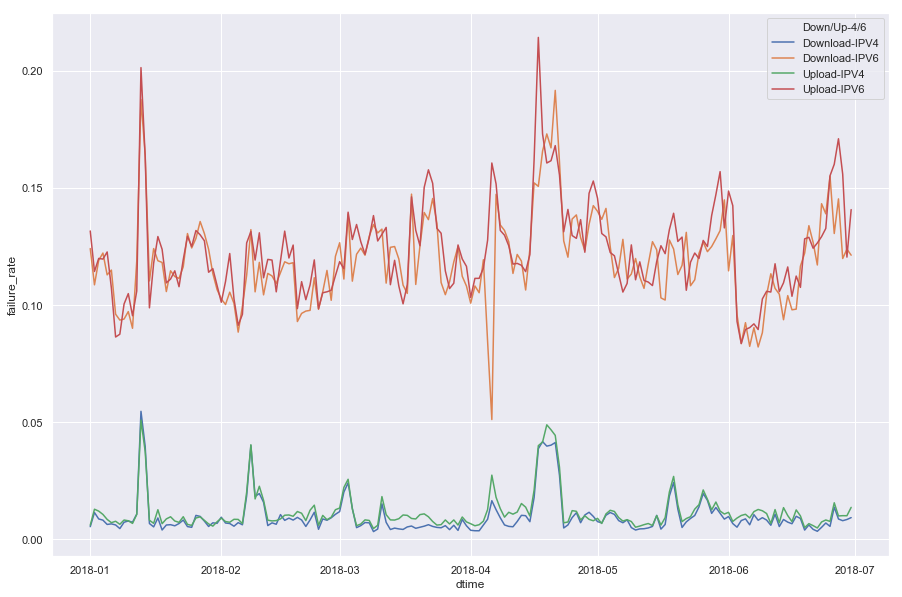

In [19]:
cc_ava_plot = down4_cc_ava
cc_ava_plot = cc_ava_plot.append(down6_cc_ava, ignore_index=True)
cc_ava_plot = cc_ava_plot.append(up4_cc_ava, ignore_index=True)
cc_ava_plot = cc_ava_plot.append(up6_cc_ava, ignore_index=True)

fig, ax = plt.subplots(1, 1, figsize=(15,10))
_ = sns.lineplot(data=cc_ava_plot, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

In [20]:
print('Proportion of days that has >99%,98%-99%,95%-98%,<95% availability rate:')
print('\n')
print('Download_IPV4:')
print('>99%:', round(len(down4_cc_ava.loc[down4_cc_ava.failure_rate < 0.01])/len(down4_cc_ava), 2))
print('98%-99%:', round(len(down4_cc_ava.loc[(down4_cc_ava.failure_rate >= 0.01)&\
                                             (down4_cc_ava.failure_rate < 0.02)])/len(down4_cc_ava), 2))
print('95%-98%:', round(len(down4_cc_ava.loc[(down4_cc_ava.failure_rate >= 0.02)&\
                                             (down4_cc_ava.failure_rate < 0.05)])/len(down4_cc_ava), 2))
print('<95%:', round(len(down4_cc_ava.loc[down4_cc_ava.failure_rate > 0.05])/len(down4_cc_ava), 2))

print('\n')
print('Download_IPV6:')
print('>90%:', round(len(down6_cc_ava.loc[down6_cc_ava.failure_rate < 0.1])/len(down6_cc_ava), 2))
print('85%-90%:', round(len(down6_cc_ava.loc[(down6_cc_ava.failure_rate >= 0.1)&\
                                             (down6_cc_ava.failure_rate < 0.15)])/len(down6_cc_ava), 2))
print('<85%:', round(len(down6_cc_ava.loc[down6_cc_ava.failure_rate > 0.15])/len(down6_cc_ava), 2))

print('\n')
print('Upload_IPV4:')
print('>99%:', round(len(up4_cc_ava.loc[up4_cc_ava.failure_rate < 0.01])/len(up4_cc_ava), 2))
print('98%-99%:', round(len(up4_cc_ava.loc[(up4_cc_ava.failure_rate >= 0.01)&\
                                             (up4_cc_ava.failure_rate < 0.02)])/len(up4_cc_ava), 2))
print('95%-98%:', round(len(up4_cc_ava.loc[(up4_cc_ava.failure_rate >= 0.02)&\
                                             (up4_cc_ava.failure_rate < 0.05)])/len(up4_cc_ava), 2))
print('<95%:', round(len(up4_cc_ava.loc[up4_cc_ava.failure_rate > 0.05])/len(up4_cc_ava), 2))

print('\n')
print('Upload_IPV6:')
print('>90%:', round(len(up6_cc_ava.loc[up6_cc_ava.failure_rate < 0.1])/len(up6_cc_ava), 2))
print('85%-90%:', round(len(up6_cc_ava.loc[(up6_cc_ava.failure_rate >= 0.1)&\
                                             (up6_cc_ava.failure_rate < 0.15)])/len(up6_cc_ava), 2))
print('<85%:', round(len(up6_cc_ava.loc[up6_cc_ava.failure_rate > 0.15])/len(up6_cc_ava), 2))

Proportion of days that has >99%,98%-99%,95%-98%,<95% availability rate:


Download_IPV4:
>99%: 0.73
98%-99%: 0.2
95%-98%: 0.06
<95%: 0.01


Download_IPV6:
>90%: 0.13
85%-90%: 0.81
<85%: 0.06


Upload_IPV4:
>99%: 0.56
98%-99%: 0.34
95%-98%: 0.09
<95%: 0.01


Upload_IPV6:
>90%: 0.08
85%-90%: 0.81
<85%: 0.11


In [21]:
# We explore whether the days with low availability are relevant to weekends.

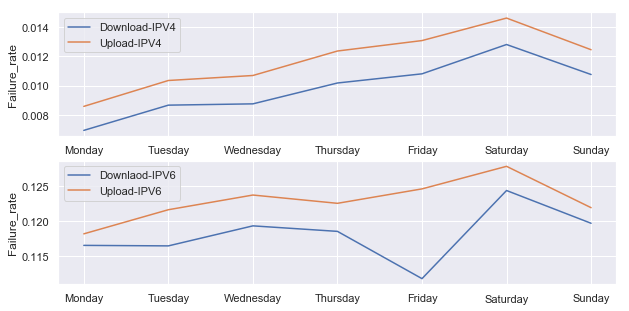

In [22]:
down4_cc_ava['dtime'] = pd.to_datetime(down4_cc_ava['dtime'])
down4_cc_weekend = down4_cc_ava[['dtime','failures','attempt']].\
    groupby(down4_cc_ava.dtime.dt.weekday_name).sum()
down4_cc_weekend['failure_rate'] = down4_cc_weekend['failures'] / down4_cc_weekend['attempt']
down4_cc_weekend = down4_cc_weekend[['failure_rate']]

down6_cc_ava['dtime'] = pd.to_datetime(down6_cc_ava['dtime'])
down6_cc_weekend = down6_cc_ava[['dtime','failures','attempt']].\
    groupby(down6_cc_ava.dtime.dt.weekday_name).sum()
down6_cc_weekend['failure_rate'] = down6_cc_weekend['failures'] / down6_cc_weekend['attempt']
down6_cc_weekend = down6_cc_weekend[['failure_rate']]

up4_cc_ava['dtime'] = pd.to_datetime(up4_cc_ava['dtime'])
up4_cc_weekend = up4_cc_ava[['dtime','failures','attempt']].\
    groupby(up4_cc_ava.dtime.dt.weekday_name).sum()
up4_cc_weekend['failure_rate'] = up4_cc_weekend['failures'] / up4_cc_weekend['attempt']
up4_cc_weekend = up4_cc_weekend[['failure_rate']]

up6_cc_ava['dtime'] = pd.to_datetime(up6_cc_ava['dtime'])
up6_cc_weekend = up6_cc_ava[['dtime','failures','attempt']].\
    groupby(up6_cc_ava.dtime.dt.weekday_name).sum()
up6_cc_weekend['failure_rate'] = up6_cc_weekend['failures'] / up6_cc_weekend['attempt']
up6_cc_weekend = up6_cc_weekend[['failure_rate']]

cc_weekend_plot = pd.concat([down4_cc_weekend, down6_cc_weekend], axis = 1)
cc_weekend_plot = pd.concat([cc_weekend_plot, up4_cc_weekend], axis = 1)
cc_weekend_plot = pd.concat([cc_weekend_plot, up6_cc_weekend], axis = 1)
cc_weekend_plot.columns = ['Download-IPV4', 'Downlaod-IPV6', 'Upload-IPV4', 'Upload-IPV6']
cc_weekend_plot.reset_index('dtime', inplace = True)
cc_weekend_plot = cc_weekend_plot.reindex([1,5,6,4,0,2,3])
cc_weekend_plot.reset_index(drop = True, inplace = True)

fig, ax = plt.subplots(2, 1, figsize=(10,5))
_ = ax[0].plot('dtime', 'Download-IPV4', data = cc_weekend_plot)
_ = ax[1].plot('dtime', 'Downlaod-IPV6', data = cc_weekend_plot)
_ = ax[0].plot('dtime', 'Upload-IPV4', data = cc_weekend_plot)
_ = ax[1].plot('dtime', 'Upload-IPV6', data = cc_weekend_plot)
_ = ax[0].legend()
_ = ax[0].set_ylabel('Failure_rate')
_ = ax[1].legend()
_ = ax[1].set_ylabel('Failure_rate')

In [23]:
# Generally availability declines from Monday to Saturday and then rises from Saturday to Monday.

In [24]:
# begin to explore if outrage relevant to time

In [25]:
down4_cc_failure_time = down_outrage4_cc[['dtime', 'failures']].groupby(down_outrage4_cc['dtime'].dt.hour).sum()
down4_cc_attempt_time = curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt['dtime'].dt.hour).sum()
down4_cc_ava_time = pd.concat([down4_cc_failure_time, down4_cc_attempt_time], axis = 1)
down4_cc_ava_time['failure_rate'] = down4_cc_ava_time['failures'] / down4_cc_ava_time['attempt']
down4_cc_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down4_cc_ava_time)
down4_cc_ava_time['Down/Up-4/6'] = ['Download-IPV4'] * len(down4_cc_ava_time)
down4_cc_ava_time.reset_index('dtime', inplace = True)

down6_cc_failure_time = down_outrage6_cc[['dtime', 'failures']].groupby(down_outrage6_cc['dtime'].dt.hour).sum()
down6_cc_attempt_time = curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt6['dtime'].dt.hour).sum()
down6_cc_ava_time = pd.concat([down6_cc_failure_time, down6_cc_attempt_time], axis = 1)
down6_cc_ava_time['failure_rate'] = down6_cc_ava_time['failures'] / down6_cc_ava_time['attempt']
down6_cc_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down6_cc_ava_time)
down6_cc_ava_time['Down/Up-4/6'] = ['Download-IPV6'] * len(down6_cc_ava_time)
down6_cc_ava_time.reset_index('dtime', inplace = True)

up4_cc_failure_time = up_outrage4_cc[['dtime', 'failures']].groupby(up_outrage4_cc['dtime'].dt.hour).sum()
up4_cc_attempt_time = curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt['dtime'].dt.hour).sum()
up4_cc_ava_time = pd.concat([up4_cc_failure_time, up4_cc_attempt_time], axis = 1)
up4_cc_ava_time['failure_rate'] = up4_cc_ava_time['failures'] / up4_cc_ava_time['attempt']
up4_cc_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up4_cc_ava_time)
up4_cc_ava_time['Down/Up-4/6'] = ['Upload-IPV4'] * len(up4_cc_ava_time)
up4_cc_ava_time.reset_index('dtime', inplace = True)

up6_cc_failure_time = up_outrage6_cc[['dtime', 'failures']].groupby(up_outrage6_cc['dtime'].dt.hour).sum()
up6_cc_attempt_time = curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt6['dtime'].dt.hour).sum()
up6_cc_ava_time = pd.concat([up6_cc_failure_time, up6_cc_attempt_time], axis = 1)
up6_cc_ava_time['failure_rate'] = up6_cc_ava_time['failures'] / up6_cc_ava_time['attempt']
up6_cc_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up6_cc_ava_time)
up6_cc_ava_time['Down/Up-4/6'] = ['Upload-IPV6'] * len(up6_cc_ava_time)
up6_cc_ava_time.reset_index('dtime', inplace = True)

down4_cc_ava_time.head()

,dtime,failures,attempt,failure_rate,ISP-Technology,Down/Up-4/6
0,0,1004,88208,0.011382,Comcast-Cable,Download-IPV4
1,1,1034,102306,0.010107,Comcast-Cable,Download-IPV4
2,2,1191,107858,0.011042,Comcast-Cable,Download-IPV4
3,3,1131,108999,0.010376,Comcast-Cable,Download-IPV4
4,4,839,85476,0.009816,Comcast-Cable,Download-IPV4


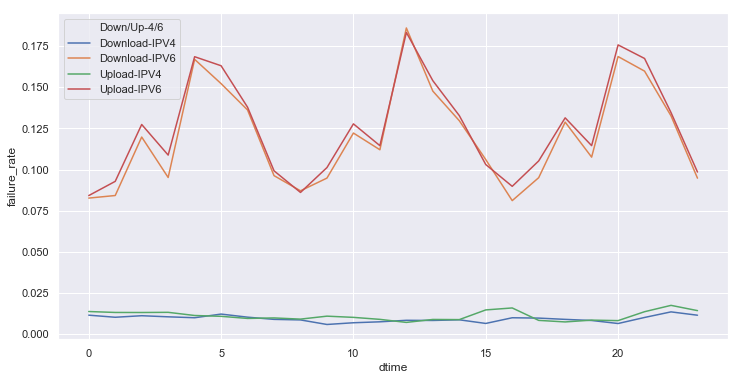

In [26]:
cc_ava_plot = down4_cc_ava_time
cc_ava_plot = cc_ava_plot.append(down6_cc_ava_time, ignore_index=True)
cc_ava_plot = cc_ava_plot.append(up4_cc_ava_time, ignore_index=True)
cc_ava_plot = cc_ava_plot.append(up6_cc_ava_time, ignore_index=True)

fig, ax = plt.subplots(1, 1, figsize=(12,6))
_ = sns.lineplot(data= cc_ava_plot, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

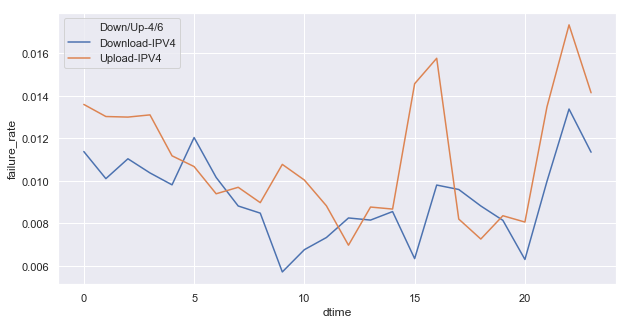

In [27]:
ipv4_data = cc_ava_plot.loc[(cc_ava_plot['Down/Up-4/6']=='Download-IPV4') | (cc_ava_plot['Down/Up-4/6']=='Upload-IPV4')]
fig, ax = plt.subplots(1, 1, figsize=(10,5))
_ = sns.lineplot(data= ipv4_data, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

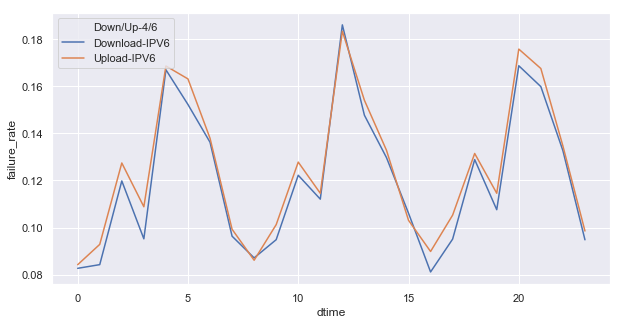

In [28]:
ipv6_data = cc_ava_plot.loc[(cc_ava_plot['Down/Up-4/6']=='Download-IPV6') | (cc_ava_plot['Down/Up-4/6']=='Upload-IPV6')]
fig, ax = plt.subplots(1, 1, figsize=(10,5))
_ = sns.lineplot(data= ipv6_data, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

In [29]:
# It indicates that IPV4 is more stable than IPV6. There are three peaks for IPV6: 4, 12, 20, during which time the 
# availability is the lowest. For IPV4, there are two peaks for IPV4 upload: 16,22 abd two peaks for download IPV4: 
# 5,22. What's interesting is that at 20, one of the lowest points of IPV4, is exacly one of the peaks for IPV6.

# Also, the difference of distribution between download and upload of IPV6 is much less than counterpart of IPV4.

In [30]:
# begin regional exploration

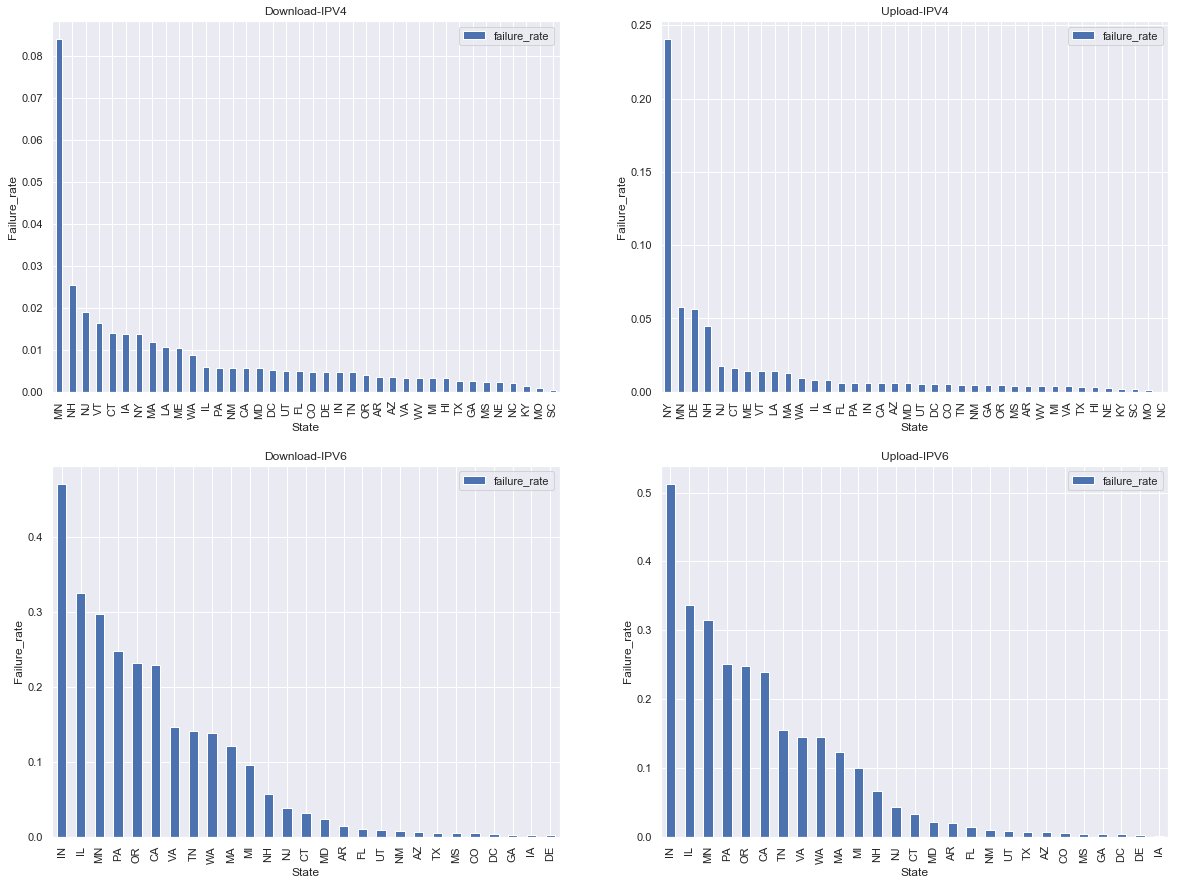

In [31]:
down4_cc_attempt_region = curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
down4_cc_attempt_region.reset_index(drop = True, inplace = True)
down4_cc_attempt_region = down4_cc_attempt_region.groupby(down4_cc_attempt_region['State']).sum()
down4_cc_attempt_region['failure_rate'] = round(down4_cc_attempt_region['failures'] / down4_cc_attempt_region['attempt'],4)
down4_cc_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

down6_cc_attempt_region = curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
down6_cc_attempt_region.reset_index(drop = True, inplace = True)
down6_cc_attempt_region = down6_cc_attempt_region.groupby(down6_cc_attempt_region['State']).sum()
down6_cc_attempt_region['failure_rate'] = round(down6_cc_attempt_region['failures'] / down6_cc_attempt_region['attempt'],4)
down6_cc_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

up4_cc_attempt_region = curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
up4_cc_attempt_region.reset_index(drop = True, inplace = True)
up4_cc_attempt_region = up4_cc_attempt_region.groupby(up4_cc_attempt_region['State']).sum()
up4_cc_attempt_region['failure_rate'] = round(up4_cc_attempt_region['failures'] / up4_cc_attempt_region['attempt'],4)
up4_cc_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

up6_cc_attempt_region = curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
up6_cc_attempt_region.reset_index(drop = True, inplace = True)
up6_cc_attempt_region = up6_cc_attempt_region.groupby(up6_cc_attempt_region['State']).sum()
up6_cc_attempt_region['failure_rate'] = round(up6_cc_attempt_region['failures'] / up6_cc_attempt_region['attempt'],4)
up6_cc_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

fig, ax = plt.subplots(2, 2, figsize=(20,15))
_ = down4_cc_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[0][0])
_ = ax[0][0].set_title('Download-IPV4')
_ = up4_cc_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[0][1])
_ = ax[0][1].set_title('Upload-IPV4')
_ = down6_cc_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[1][0])
_ = ax[1][0].set_title('Download-IPV6')
_ = up6_cc_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[1][1])
_ = ax[1][1].set_title('Upload-IPV6')
_ = ax[0][0].set_ylabel('Failure_rate')
_ = ax[0][1].set_ylabel('Failure_rate')
_ = ax[1][0].set_ylabel('Failure_rate')
_ = ax[1][1].set_ylabel('Failure_rate')

In [32]:
# Not surprisingly, the distribution of download and upload are approximately the same. But it is weired why NY
# upload-IPV4 failure rate and MN download-IPV4 failure rate is extremely high. Let's take a look.

In [33]:
# begin to explore why NY upload-IPV4 failure rate is extremely high

In [34]:
tem = curr_httppostmt.loc[(curr_httppostmt['ISP'] == ISP_present) & \
                          (curr_httppostmt['State'] == 'NY'), ['unit_id','dtime','failures', 'attempt']]
tem.reset_index(drop = True, inplace = True)
tem.head()

,unit_id,dtime,failures,attempt
0,9587,2018-01-01 04:57:09,0,1
1,9587,2018-01-01 04:58:39,1,1
2,9587,2018-01-01 16:57:19,0,1
3,9587,2018-01-01 16:58:49,1,1
4,9587,2018-01-02 04:57:36,0,1


In [35]:
# explore if it is relevant to nodes
tem[['unit_id','failures', 'attempt']].groupby('unit_id').sum()

,failures,attempt
unit_id,,
1214,23,2779
9587,1450,3337


In [36]:
# There must be something wrong with node 9587.

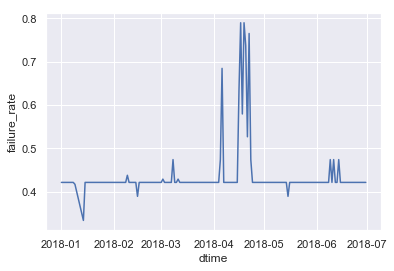

In [37]:
tem = tem.loc[tem['unit_id'] == 9587]
tem = tem[['dtime','failures', 'attempt']].groupby(tem.dtime.dt.date).sum()
tem['failure_rate'] = tem['failures'] / tem['attempt']
tem.reset_index('dtime', inplace = True)
_ = sns.lineplot(data=tem, x='dtime', y='failure_rate')

In [38]:
# We can see that the failure rate of node 9587 upload IPV4 is consistently high and especially high in the middle
# of April, 2018.

In [39]:
# begin to explore why MN download-IPV4 failure rate is extremely high

In [41]:
tem = curr_httpgetmt.loc[(curr_httpgetmt['ISP'] == ISP_present) & \
                          (curr_httpgetmt['State'] == 'MN'), ['unit_id','dtime','failures', 'attempt']]
tem.reset_index(drop = True, inplace = True)
tem.head()

,unit_id,dtime,failures,attempt
0,1229,2018-01-01 05:47:57,1,1
1,1229,2018-01-01 05:53:02,1,1
2,1229,2018-01-01 11:38:55,0,1
3,1229,2018-01-01 11:40:30,0,1
4,1229,2018-01-02 05:38:04,0,1


In [42]:
# explore if it is relevant to nodes
tem[['unit_id','failures', 'attempt']].groupby('unit_id').sum()

,failures,attempt
unit_id,,
1229,1960,3458
5746,19,2263
6329,117,3105
7594,44,2877
7772,27,3465
8820,0,281
9760,7,3107
11504,22,3094
11943,20,2684


In [43]:
# It seems that there is something wrong with node 1229 and node 1010028.

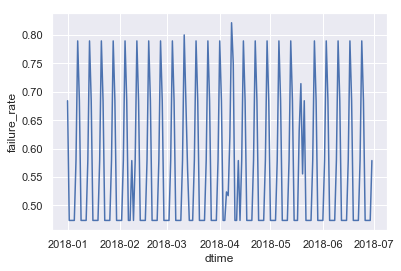

In [44]:
tem = tem.loc[tem['unit_id'] == 1229]
tem = tem[['dtime','failures', 'attempt']].groupby(tem.dtime.dt.date).sum()
tem['failure_rate'] = tem['failures'] / tem['attempt']
tem.reset_index('dtime', inplace = True)
_ = sns.lineplot(data=tem, x='dtime', y='failure_rate')

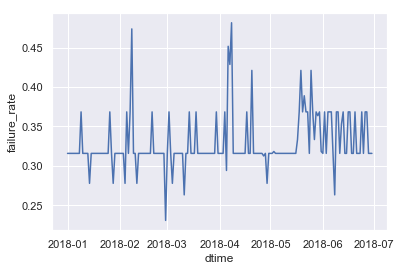

In [46]:
tem = curr_httpgetmt.loc[(curr_httpgetmt['ISP'] == ISP_present) & \
                          (curr_httpgetmt['State'] == 'MN'), ['unit_id','dtime','failures', 'attempt']]
tem.reset_index(drop = True, inplace = True)
tem = tem.loc[tem['unit_id'] == 1010028]
tem = tem[['dtime','failures', 'attempt']].groupby(tem.dtime.dt.date).sum()
tem['failure_rate'] = tem['failures'] / tem['attempt']
tem.reset_index('dtime', inplace = True)
_ = sns.lineplot(data=tem, x='dtime', y='failure_rate')

## Verizon

In [6]:
ISP_present = 'Verizon'

In [7]:
print(curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present]['Technology'].unique())
print(curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present]['Technology'].unique())
print(curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present]['Technology'].unique())
print(curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present]['Technology'].unique())

['Fiber']
['Fiber']
['Fiber']
['Fiber']


In [8]:
# Verizon only provides Fiber.

In [9]:
Technology_present = 'Fiber'

In [10]:
print('{} percentage among all the observations:'.format(ISP_present))
print('Download_IPV4:', len(curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present]) / len(curr_httpgetmt))
print('Download_IPV6:', len(curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present]) / len(curr_httpgetmt6))
print('Upload_IPV4:', len(curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present]) / len(curr_httppostmt))
print('Upload_IPV6:', len(curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present]) / len(curr_httppostmt6))

Verizon percentage among all the observations:
Download_IPV4: 0.08717295188762622
Download_IPV6: 0.008059566138209809
Upload_IPV4: 0.0872364539899201
Upload_IPV6: 0.008166680282495585


In [11]:
print('{} percentage among all the outrages:'.format(ISP_present))
down_outrage4_vr = down_outrage4.loc[down_outrage4['ISP'] == ISP_present]
down_outrage4_vr.reset_index(drop = True, inplace = True)
print('Download_IPV4:', len(down_outrage4_vr) / len(down_outrage4))
down_outrage6_vr = down_outrage6.loc[down_outrage6['ISP'] == ISP_present]
down_outrage6_vr.reset_index(drop = True, inplace = True)
print('Download_IPV6:', len(down_outrage6_vr) / len(down_outrage6))
up_outrage4_vr = up_outrage4.loc[up_outrage4['ISP'] == ISP_present]
up_outrage4_vr.reset_index(drop = True, inplace = True)
print('Upload_IPV4:', len(up_outrage4_vr) / len(up_outrage4))
up_outrage6_vr = up_outrage6.loc[up_outrage6['ISP'] == ISP_present]
up_outrage6_vr.reset_index(drop = True, inplace = True)
print('Upload_IPV6:', len(up_outrage6_vr) / len(up_outrage6))

Verizon percentage among all the outrages:
Download_IPV4: 0.06978538702676634
Download_IPV6: 0.019856737317428333
Upload_IPV4: 0.04417986814916855
Upload_IPV6: 0.018625437184255814


In [12]:
# Compared the two percentages correspondingly, we could say that the IPV4 service of Verizon is above average of all
# IPV4 service provider but IPV6 is below average.

In [13]:
print(down_outrage4_vr['Technology'].unique())
print(down_outrage6_vr['Technology'].unique())
print(up_outrage4_vr['Technology'].unique())
print(up_outrage6_vr['Technology'].unique())

['Fiber']
['Fiber']
['Fiber']
['Fiber']


In [14]:
# All the instances of outrages are fiber.

In [15]:
# begin to plot by date

In [16]:
down4_vr_failure_day = down_outrage4_vr[['dtime', 'failures']].groupby(down_outrage4_vr['dtime'].dt.date).sum()
down4_vr_attempt_day = curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt['dtime'].dt.date).sum()
down4_vr_ava = pd.concat([down4_vr_failure_day, down4_vr_attempt_day], axis = 1)
down4_vr_ava['failure_rate'] = down4_vr_ava['failures'] / down4_vr_ava['attempt']
down4_vr_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down4_vr_ava)
down4_vr_ava['Down/Up-4/6'] = ['Download-IPV4'] * len(down4_vr_ava)
down4_vr_ava.reset_index('dtime', inplace = True)

down6_vr_failure_day = down_outrage6_vr[['dtime', 'failures']].groupby(down_outrage6_vr['dtime'].dt.date).sum()
down6_vr_attempt_day = curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt6['dtime'].dt.date).sum()
down6_vr_ava = pd.concat([down6_vr_failure_day, down6_vr_attempt_day], axis = 1)
down6_vr_ava['failure_rate'] = down6_vr_ava['failures'] / down6_vr_ava['attempt']
down6_vr_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down6_vr_ava)
down6_vr_ava['Down/Up-4/6'] = ['Download-IPV6'] * len(down6_vr_ava)
down6_vr_ava.reset_index('dtime', inplace = True)

up4_vr_failure_day = up_outrage4_vr[['dtime', 'failures']].groupby(up_outrage4_vr['dtime'].dt.date).sum()
up4_vr_attempt_day = curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt['dtime'].dt.date).sum()
up4_vr_ava = pd.concat([up4_vr_failure_day, up4_vr_attempt_day], axis = 1)
up4_vr_ava['failure_rate'] = up4_vr_ava['failures'] / up4_vr_ava['attempt']
up4_vr_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up4_vr_ava)
up4_vr_ava['Down/Up-4/6'] = ['Upload-IPV4'] * len(up4_vr_ava)
up4_vr_ava.reset_index('dtime', inplace = True)

up6_vr_failure_day = up_outrage6_vr[['dtime', 'failures']].groupby(up_outrage6_vr['dtime'].dt.date).sum()
up6_vr_attempt_day = curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt6['dtime'].dt.date).sum()
up6_vr_ava = pd.concat([up6_vr_failure_day, up6_vr_attempt_day], axis = 1)
up6_vr_ava['failure_rate'] = up6_vr_ava['failures'] / up6_vr_ava['attempt']
up6_vr_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up6_vr_ava)
up6_vr_ava['Down/Up-4/6'] = ['Upload-IPV6'] * len(up6_vr_ava)
up6_vr_ava.reset_index('dtime', inplace = True)

down4_vr_ava.head()

,dtime,failures,attempt,failure_rate,ISP-Technology,Down/Up-4/6
0,2018-01-01,26,5118,0.005080,Verizon-Fiber,Download-IPV4
1,2018-01-02,36,4967,0.007248,Verizon-Fiber,Download-IPV4
2,2018-01-03,18,5028,0.003580,Verizon-Fiber,Download-IPV4
3,2018-01-04,25,4994,0.005006,Verizon-Fiber,Download-IPV4
4,2018-01-05,16,4961,0.003225,Verizon-Fiber,Download-IPV4


/Users/panzichen/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


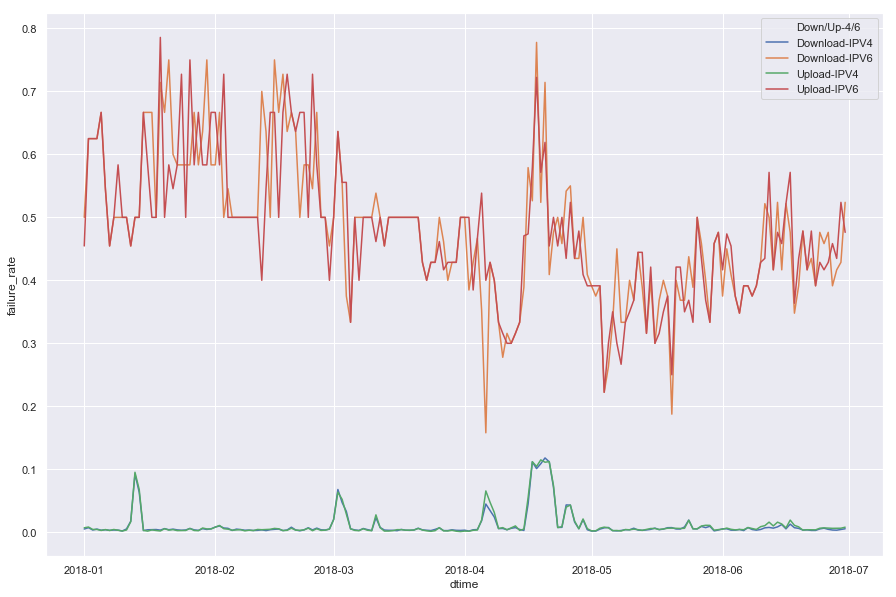

In [17]:
vr_ava_plot = down4_vr_ava
vr_ava_plot = vr_ava_plot.append(down6_vr_ava, ignore_index=True)
vr_ava_plot = vr_ava_plot.append(up4_vr_ava, ignore_index=True)
vr_ava_plot = vr_ava_plot.append(up6_vr_ava, ignore_index=True)

fig, ax = plt.subplots(1, 1, figsize=(15,10))
_ = sns.lineplot(data=vr_ava_plot, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

In [18]:
print('Proportion of days that has >99%,98%-99%,95%-98%,<95% availability rate:')
print('\n')
print('Download_IPV4:')
print('>99%:', round(len(down4_vr_ava.loc[down4_vr_ava.failure_rate < 0.01])/len(down4_vr_ava), 2))
print('98%-99%:', round(len(down4_vr_ava.loc[(down4_vr_ava.failure_rate >= 0.01)&\
                                             (down4_vr_ava.failure_rate < 0.02)])/len(down4_vr_ava), 2))
print('95%-98%:', round(len(down4_vr_ava.loc[(down4_vr_ava.failure_rate >= 0.02)&\
                                             (down4_vr_ava.failure_rate < 0.05)])/len(down4_vr_ava), 2))
print('<95%:', round(len(down4_vr_ava.loc[down4_vr_ava.failure_rate > 0.05])/len(down4_vr_ava), 2))

print('\n')
print('Download_IPV6:')
print('>90%:', round(len(down6_vr_ava.loc[down6_vr_ava.failure_rate < 0.1])/len(down6_vr_ava), 2))
print('85%-90%:', round(len(down6_vr_ava.loc[(down6_vr_ava.failure_rate >= 0.1)&\
                                             (down6_vr_ava.failure_rate < 0.15)])/len(down6_vr_ava), 2))
print('<85%:', round(len(down6_vr_ava.loc[down6_vr_ava.failure_rate > 0.15])/len(down6_vr_ava), 2))

print('\n')
print('Upload_IPV4:')
print('>99%:', round(len(up4_vr_ava.loc[up4_vr_ava.failure_rate < 0.01])/len(up4_vr_ava), 2))
print('98%-99%:', round(len(up4_vr_ava.loc[(up4_vr_ava.failure_rate >= 0.01)&\
                                             (up4_vr_ava.failure_rate < 0.02)])/len(up4_vr_ava), 2))
print('95%-98%:', round(len(up4_vr_ava.loc[(up4_vr_ava.failure_rate >= 0.02)&\
                                             (up4_vr_ava.failure_rate < 0.05)])/len(up4_vr_ava), 2))
print('<95%:', round(len(up4_vr_ava.loc[up4_vr_ava.failure_rate > 0.05])/len(up4_vr_ava), 2))

print('\n')
print('Upload_IPV6:')
print('>90%:', round(len(up6_vr_ava.loc[up6_vr_ava.failure_rate < 0.1])/len(up6_vr_ava), 2))
print('85%-90%:', round(len(up6_vr_ava.loc[(up6_vr_ava.failure_rate >= 0.1)&\
                                             (up6_vr_ava.failure_rate < 0.15)])/len(up6_vr_ava), 2))
print('<85%:', round(len(up6_vr_ava.loc[up6_vr_ava.failure_rate > 0.15])/len(up6_vr_ava), 2))

Proportion of days that has >99%,98%-99%,95%-98%,<95% availability rate:


Download_IPV4:
>99%: 0.86
98%-99%: 0.03
95%-98%: 0.06
<95%: 0.05


Download_IPV6:
>90%: 0.0
85%-90%: 0.0
<85%: 1.0


Upload_IPV4:
>99%: 0.81
98%-99%: 0.08
95%-98%: 0.04
<95%: 0.07


Upload_IPV6:
>90%: 0.0
85%-90%: 0.0
<85%: 1.0


In [19]:
# We explore whether the days with low availability are relevant to weekends.

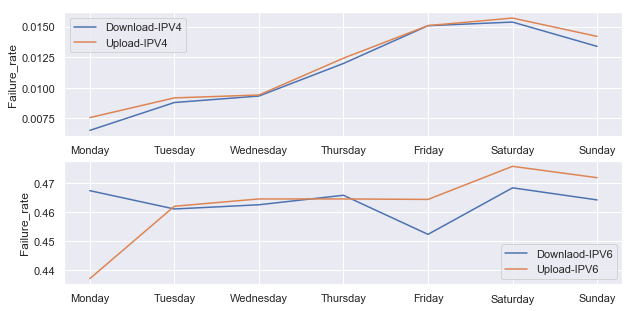

In [20]:
down4_vr_ava['dtime'] = pd.to_datetime(down4_vr_ava['dtime'])
down4_vr_weekend = down4_vr_ava[['dtime','failures','attempt']].\
    groupby(down4_vr_ava.dtime.dt.weekday_name).sum()
down4_vr_weekend['failure_rate'] = down4_vr_weekend['failures'] / down4_vr_weekend['attempt']
down4_vr_weekend = down4_vr_weekend[['failure_rate']]

down6_vr_ava['dtime'] = pd.to_datetime(down6_vr_ava['dtime'])
down6_vr_weekend = down6_vr_ava[['dtime','failures','attempt']].\
    groupby(down6_vr_ava.dtime.dt.weekday_name).sum()
down6_vr_weekend['failure_rate'] = down6_vr_weekend['failures'] / down6_vr_weekend['attempt']
down6_vr_weekend = down6_vr_weekend[['failure_rate']]

up4_vr_ava['dtime'] = pd.to_datetime(up4_vr_ava['dtime'])
up4_vr_weekend = up4_vr_ava[['dtime','failures','attempt']].\
    groupby(up4_vr_ava.dtime.dt.weekday_name).sum()
up4_vr_weekend['failure_rate'] = up4_vr_weekend['failures'] / up4_vr_weekend['attempt']
up4_vr_weekend = up4_vr_weekend[['failure_rate']]

up6_vr_ava['dtime'] = pd.to_datetime(up6_vr_ava['dtime'])
up6_vr_weekend = up6_vr_ava[['dtime','failures','attempt']].\
    groupby(up6_vr_ava.dtime.dt.weekday_name).sum()
up6_vr_weekend['failure_rate'] = up6_vr_weekend['failures'] / up6_vr_weekend['attempt']
up6_vr_weekend = up6_vr_weekend[['failure_rate']]

vr_weekend_plot = pd.concat([down4_vr_weekend, down6_vr_weekend], axis = 1)
vr_weekend_plot = pd.concat([vr_weekend_plot, up4_vr_weekend], axis = 1)
vr_weekend_plot = pd.concat([vr_weekend_plot, up6_vr_weekend], axis = 1)
vr_weekend_plot.columns = ['Download-IPV4', 'Downlaod-IPV6', 'Upload-IPV4', 'Upload-IPV6']
vr_weekend_plot.reset_index('dtime', inplace = True)
vr_weekend_plot = vr_weekend_plot.reindex([1,5,6,4,0,2,3])
vr_weekend_plot.reset_index(drop = True, inplace = True)

fig, ax = plt.subplots(2, 1, figsize=(10,5))
_ = ax[0].plot('dtime', 'Download-IPV4', data = vr_weekend_plot)
_ = ax[1].plot('dtime', 'Downlaod-IPV6', data = vr_weekend_plot)
_ = ax[0].plot('dtime', 'Upload-IPV4', data = vr_weekend_plot)
_ = ax[1].plot('dtime', 'Upload-IPV6', data = vr_weekend_plot)
_ = ax[0].legend()
_ = ax[0].set_ylabel('Failure_rate')
_ = ax[1].legend()
_ = ax[1].set_ylabel('Failure_rate')

In [21]:
# Generally availability declines from Monday to Saturday and then rises from Saturday to Monday.

In [22]:
# begin to explore if outrage relevant to time

In [23]:
down4_vr_failure_time = down_outrage4_vr[['dtime', 'failures']].groupby(down_outrage4_vr['dtime'].dt.hour).sum()
down4_vr_attempt_time = curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt['dtime'].dt.hour).sum()
down4_vr_ava_time = pd.concat([down4_vr_failure_time, down4_vr_attempt_time], axis = 1)
down4_vr_ava_time['failure_rate'] = down4_vr_ava_time['failures'] / down4_vr_ava_time['attempt']
down4_vr_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down4_vr_ava_time)
down4_vr_ava_time['Down/Up-4/6'] = ['Download-IPV4'] * len(down4_vr_ava_time)
down4_vr_ava_time.reset_index('dtime', inplace = True)

down6_vr_failure_time = down_outrage6_vr[['dtime', 'failures']].groupby(down_outrage6_vr['dtime'].dt.hour).sum()
down6_vr_attempt_time = curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt6['dtime'].dt.hour).sum()
down6_vr_ava_time = pd.concat([down6_vr_failure_time, down6_vr_attempt_time], axis = 1)
down6_vr_ava_time['failure_rate'] = down6_vr_ava_time['failures'] / down6_vr_ava_time['attempt']
down6_vr_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down6_vr_ava_time)
down6_vr_ava_time['Down/Up-4/6'] = ['Download-IPV6'] * len(down6_vr_ava_time)
down6_vr_ava_time.reset_index('dtime', inplace = True)

up4_vr_failure_time = up_outrage4_vr[['dtime', 'failures']].groupby(up_outrage4_vr['dtime'].dt.hour).sum()
up4_vr_attempt_time = curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt['dtime'].dt.hour).sum()
up4_vr_ava_time = pd.concat([up4_vr_failure_time, up4_vr_attempt_time], axis = 1)
up4_vr_ava_time['failure_rate'] = up4_vr_ava_time['failures'] / up4_vr_ava_time['attempt']
up4_vr_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up4_vr_ava_time)
up4_vr_ava_time['Down/Up-4/6'] = ['Upload-IPV4'] * len(up4_vr_ava_time)
up4_vr_ava_time.reset_index('dtime', inplace = True)

up6_vr_failure_time = up_outrage6_vr[['dtime', 'failures']].groupby(up_outrage6_vr['dtime'].dt.hour).sum()
up6_vr_attempt_time = curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt6['dtime'].dt.hour).sum()
up6_vr_ava_time = pd.concat([up6_vr_failure_time, up6_vr_attempt_time], axis = 1)
up6_vr_ava_time['failure_rate'] = up6_vr_ava_time['failures'] / up6_vr_ava_time['attempt']
up6_vr_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up6_vr_ava_time)
up6_vr_ava_time['Down/Up-4/6'] = ['Upload-IPV6'] * len(up6_vr_ava_time)
up6_vr_ava_time.reset_index('dtime', inplace = True)

down4_vr_ava_time.head()

,dtime,failures,attempt,failure_rate,ISP-Technology,Down/Up-4/6
0,0,1112,83847,0.013262,Verizon-Fiber,Download-IPV4
1,1,1074,81757,0.013136,Verizon-Fiber,Download-IPV4
2,2,947,80555,0.011756,Verizon-Fiber,Download-IPV4
3,3,849,82892,0.010242,Verizon-Fiber,Download-IPV4
4,4,423,48039,0.008805,Verizon-Fiber,Download-IPV4


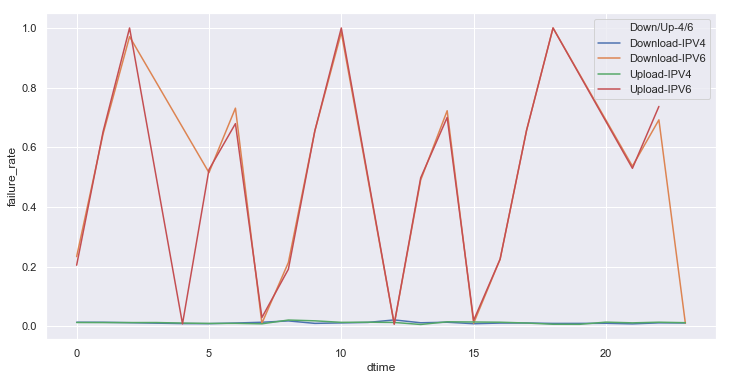

In [24]:
vr_ava_plot = down4_vr_ava_time
vr_ava_plot = vr_ava_plot.append(down6_vr_ava_time, ignore_index=True)
vr_ava_plot = vr_ava_plot.append(up4_vr_ava_time, ignore_index=True)
vr_ava_plot = vr_ava_plot.append(up6_vr_ava_time, ignore_index=True)

fig, ax = plt.subplots(1, 1, figsize=(12,6))
_ = sns.lineplot(data= vr_ava_plot, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

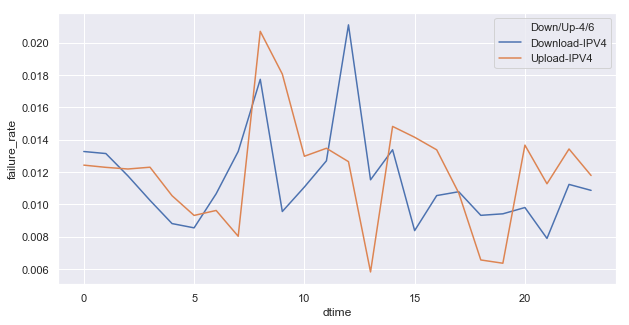

In [25]:
ipv4_data = vr_ava_plot.loc[(vr_ava_plot['Down/Up-4/6']=='Download-IPV4') | (vr_ava_plot['Down/Up-4/6']=='Upload-IPV4')]
fig, ax = plt.subplots(1, 1, figsize=(10,5))
_ = sns.lineplot(data= ipv4_data, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

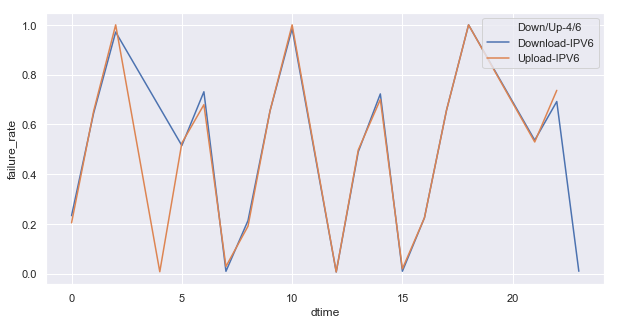

In [26]:
ipv6_data = vr_ava_plot.loc[(vr_ava_plot['Down/Up-4/6']=='Download-IPV6') | (vr_ava_plot['Down/Up-4/6']=='Upload-IPV6')]
fig, ax = plt.subplots(1, 1, figsize=(10,5))
_ = sns.lineplot(data= ipv6_data, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

In [27]:
# begin regional exploration

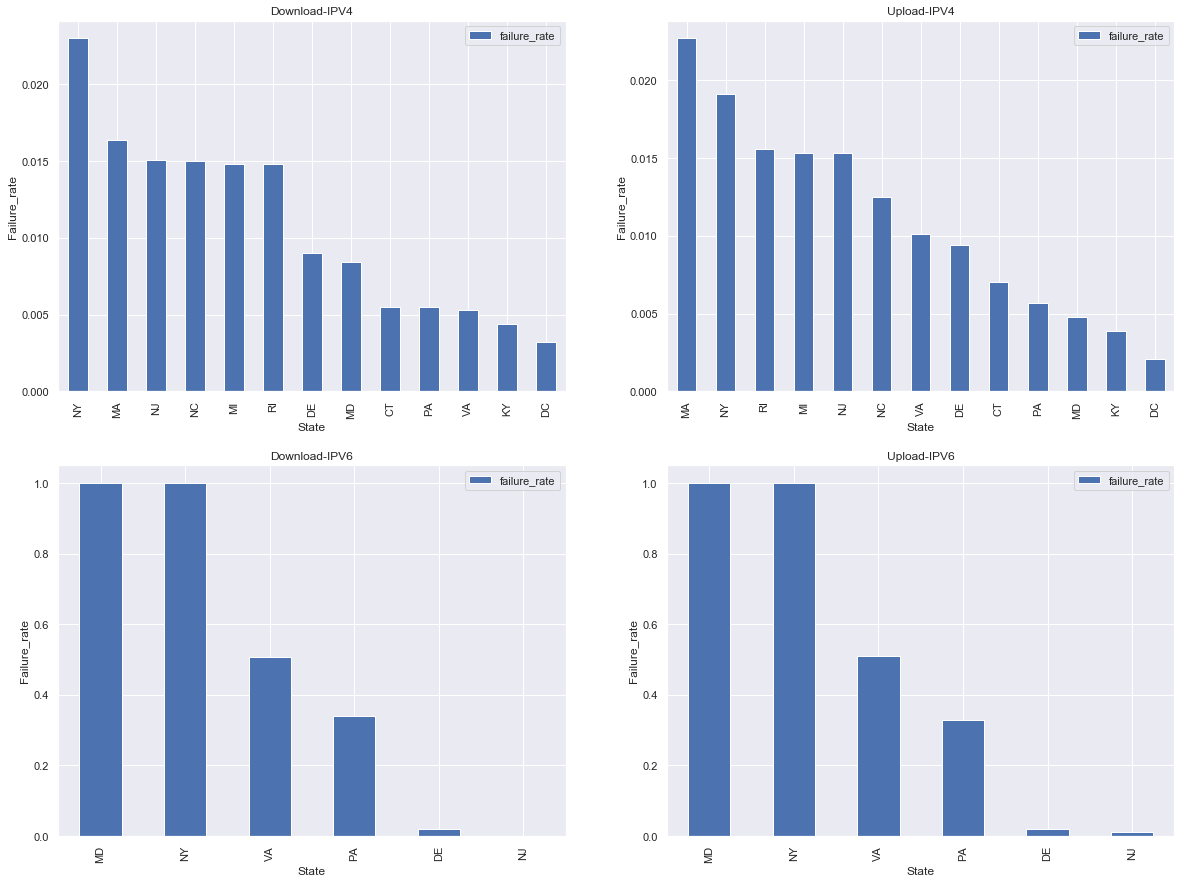

In [28]:
down4_vr_attempt_region = curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
down4_vr_attempt_region.reset_index(drop = True, inplace = True)
down4_vr_attempt_region = down4_vr_attempt_region.groupby(down4_vr_attempt_region['State']).sum()
down4_vr_attempt_region['failure_rate'] = round(down4_vr_attempt_region['failures'] / down4_vr_attempt_region['attempt'],4)
down4_vr_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

down6_vr_attempt_region = curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
down6_vr_attempt_region.reset_index(drop = True, inplace = True)
down6_vr_attempt_region = down6_vr_attempt_region.groupby(down6_vr_attempt_region['State']).sum()
down6_vr_attempt_region['failure_rate'] = round(down6_vr_attempt_region['failures'] / down6_vr_attempt_region['attempt'],4)
down6_vr_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

up4_vr_attempt_region = curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
up4_vr_attempt_region.reset_index(drop = True, inplace = True)
up4_vr_attempt_region = up4_vr_attempt_region.groupby(up4_vr_attempt_region['State']).sum()
up4_vr_attempt_region['failure_rate'] = round(up4_vr_attempt_region['failures'] / up4_vr_attempt_region['attempt'],4)
up4_vr_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

up6_vr_attempt_region = curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
up6_vr_attempt_region.reset_index(drop = True, inplace = True)
up6_vr_attempt_region = up6_vr_attempt_region.groupby(up6_vr_attempt_region['State']).sum()
up6_vr_attempt_region['failure_rate'] = round(up6_vr_attempt_region['failures'] / up6_vr_attempt_region['attempt'],4)
up6_vr_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

fig, ax = plt.subplots(2, 2, figsize=(20,15))
_ = down4_vr_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[0][0])
_ = ax[0][0].set_title('Download-IPV4')
_ = up4_vr_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[0][1])
_ = ax[0][1].set_title('Upload-IPV4')
_ = down6_vr_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[1][0])
_ = ax[1][0].set_title('Download-IPV6')
_ = up6_vr_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[1][1])
_ = ax[1][1].set_title('Upload-IPV6')
_ = ax[0][0].set_ylabel('Failure_rate')
_ = ax[0][1].set_ylabel('Failure_rate')
_ = ax[1][0].set_ylabel('Failure_rate')
_ = ax[1][1].set_ylabel('Failure_rate')

## AT&T

In [47]:
ISP_present = 'AT&T'

In [48]:
print(curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present]['Technology'].unique())
print(curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present]['Technology'].unique())
print(curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present]['Technology'].unique())
print(curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present]['Technology'].unique())

['IPBB']
['IPBB']
['IPBB']
['IPBB']


In [49]:
# AT&T only provides IPBB Technology.

In [50]:
Technology_present = 'IPBB'

In [51]:
print('{} percentage among all the observations:'.format(ISP_present))
print('Download_IPV4:', len(curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present]) / len(curr_httpgetmt))
print('Download_IPV6:', len(curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present]) / len(curr_httpgetmt6))
print('Upload_IPV4:', len(curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present]) / len(curr_httppostmt))
print('Upload_IPV6:', len(curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present]) / len(curr_httppostmt6))

AT&T percentage among all the observations:
Download_IPV4: 0.1196246297577882
Download_IPV6: 0.3786475412102344
Upload_IPV4: 0.1200247626177141
Upload_IPV6: 0.37768149665191464


In [52]:
print('{} percentage among all the outrages:'.format(ISP_present))
down_outrage4_att = down_outrage4.loc[down_outrage4['ISP'] == ISP_present]
down_outrage4_att.reset_index(drop = True, inplace = True)
print('Download_IPV4:', len(down_outrage4_att) / len(down_outrage4))
down_outrage6_att = down_outrage6.loc[down_outrage6['ISP'] == ISP_present]
down_outrage6_att.reset_index(drop = True, inplace = True)
print('Download_IPV6:', len(down_outrage6_att) / len(down_outrage6))
up_outrage4_att = up_outrage4.loc[up_outrage4['ISP'] == ISP_present]
up_outrage4_att.reset_index(drop = True, inplace = True)
print('Upload_IPV4:', len(up_outrage4_att) / len(up_outrage4))
up_outrage6_att = up_outrage6.loc[up_outrage6['ISP'] == ISP_present]
up_outrage6_att.reset_index(drop = True, inplace = True)
print('Upload_IPV6:', len(up_outrage6_att) / len(up_outrage6))

AT&T percentage among all the outrages:
Download_IPV4: 0.07117020910124358
Download_IPV6: 0.2502243075882154
Upload_IPV4: 0.05040021561589568
Upload_IPV6: 0.24325487148170766


In [53]:
# Compared the two percentages correspondingly, we could say that the both the IPV4 and IPV6 service of Verizon is 
# above average.

In [54]:
print(down_outrage4_att['Technology'].unique())
print(down_outrage6_att['Technology'].unique())
print(up_outrage4_att['Technology'].unique())
print(up_outrage6_att['Technology'].unique())

['IPBB']
['IPBB']
['IPBB']
['IPBB']


In [55]:
# begin to plot by date

In [56]:
down4_att_failure_day = down_outrage4_att[['dtime', 'failures']].groupby(down_outrage4_att['dtime'].dt.date).sum()
down4_att_attempt_day = curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt['dtime'].dt.date).sum()
down4_att_ava = pd.concat([down4_att_failure_day, down4_att_attempt_day], axis = 1)
down4_att_ava['failure_rate'] = down4_att_ava['failures'] / down4_att_ava['attempt']
down4_att_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down4_att_ava)
down4_att_ava['Down/Up-4/6'] = ['Download-IPV4'] * len(down4_att_ava)
down4_att_ava.reset_index('dtime', inplace = True)

down6_att_failure_day = down_outrage6_att[['dtime', 'failures']].groupby(down_outrage6_att['dtime'].dt.date).sum()
down6_att_attempt_day = curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt6['dtime'].dt.date).sum()
down6_att_ava = pd.concat([down6_att_failure_day, down6_att_attempt_day], axis = 1)
down6_att_ava['failure_rate'] = down6_att_ava['failures'] / down6_att_ava['attempt']
down6_att_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down6_att_ava)
down6_att_ava['Down/Up-4/6'] = ['Download-IPV6'] * len(down6_att_ava)
down6_att_ava.reset_index('dtime', inplace = True)

up4_att_failure_day = up_outrage4_att[['dtime', 'failures']].groupby(up_outrage4_att['dtime'].dt.date).sum()
up4_att_attempt_day = curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt['dtime'].dt.date).sum()
up4_att_ava = pd.concat([up4_att_failure_day, up4_att_attempt_day], axis = 1)
up4_att_ava['failure_rate'] = up4_att_ava['failures'] / up4_att_ava['attempt']
up4_att_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up4_att_ava)
up4_att_ava['Down/Up-4/6'] = ['Upload-IPV4'] * len(up4_att_ava)
up4_att_ava.reset_index('dtime', inplace = True)

up6_att_failure_day = up_outrage6_att[['dtime', 'failures']].groupby(up_outrage6_att['dtime'].dt.date).sum()
up6_att_attempt_day = curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt6['dtime'].dt.date).sum()
up6_att_ava = pd.concat([up6_att_failure_day, up6_att_attempt_day], axis = 1)
up6_att_ava['failure_rate'] = up6_att_ava['failures'] / up6_att_ava['attempt']
up6_att_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up6_att_ava)
up6_att_ava['Down/Up-4/6'] = ['Upload-IPV6'] * len(up6_att_ava)
up6_att_ava.reset_index('dtime', inplace = True)

down4_att_ava.head()

,dtime,failures,attempt,failure_rate,ISP-Technology,Down/Up-4/6
0,2018-01-01,44,7153,0.006151,AT&T-IPBB,Download-IPV4
1,2018-01-02,57,7103,0.008025,AT&T-IPBB,Download-IPV4
2,2018-01-03,146,7146,0.020431,AT&T-IPBB,Download-IPV4
3,2018-01-04,76,7072,0.010747,AT&T-IPBB,Download-IPV4
4,2018-01-05,46,7048,0.006527,AT&T-IPBB,Download-IPV4


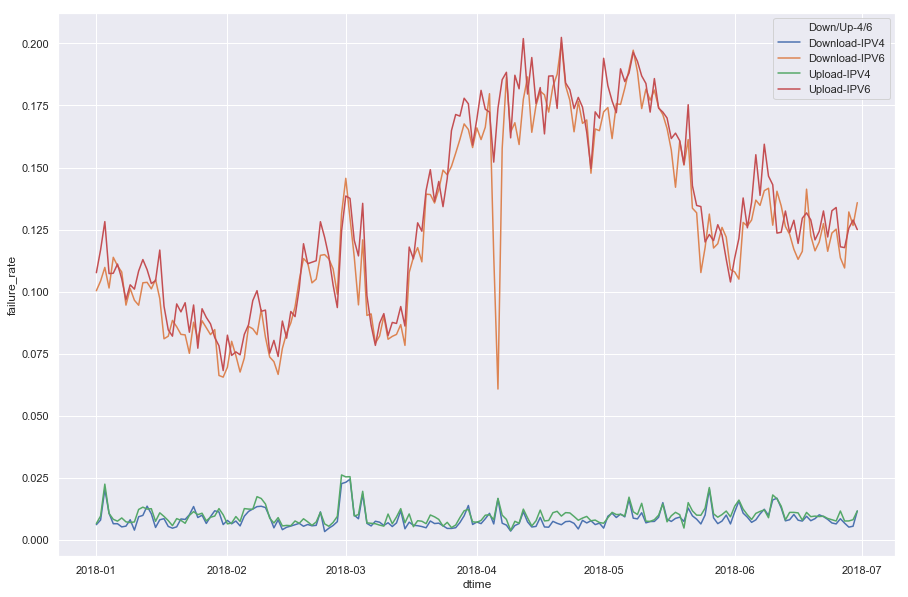

In [57]:
att_ava_plot = down4_att_ava
att_ava_plot = att_ava_plot.append(down6_att_ava, ignore_index=True)
att_ava_plot = att_ava_plot.append(up4_att_ava, ignore_index=True)
att_ava_plot = att_ava_plot.append(up6_att_ava, ignore_index=True)

fig, ax = plt.subplots(1, 1, figsize=(15,10))
_ = sns.lineplot(data=att_ava_plot, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

In [58]:
print('Proportion of days that has >99%,98%-99%,95%-98%,<95% availability rate:')
print('\n')
print('Download_IPV4:')
print('>99%:', round(len(down4_att_ava.loc[down4_att_ava.failure_rate < 0.01])/len(down4_att_ava), 2))
print('98%-99%:', round(len(down4_att_ava.loc[(down4_att_ava.failure_rate >= 0.01)&\
                                             (down4_att_ava.failure_rate < 0.02)])/len(down4_att_ava), 2))
print('95%-98%:', round(len(down4_att_ava.loc[(down4_att_ava.failure_rate >= 0.02)&\
                                             (down4_att_ava.failure_rate < 0.05)])/len(down4_att_ava), 2))
print('<95%:', round(len(down4_att_ava.loc[down4_att_ava.failure_rate > 0.05])/len(down4_att_ava), 2))

print('\n')
print('Download_IPV6:')
print('>90%:', round(len(down6_att_ava.loc[down6_att_ava.failure_rate < 0.1])/len(down6_att_ava), 2))
print('85%-90%:', round(len(down6_att_ava.loc[(down6_att_ava.failure_rate >= 0.1)&\
                                             (down6_att_ava.failure_rate < 0.15)])/len(down6_att_ava), 2))
print('<85%:', round(len(down6_att_ava.loc[down6_att_ava.failure_rate > 0.15])/len(down6_att_ava), 2))

print('\n')
print('Upload_IPV4:')
print('>99%:', round(len(up4_att_ava.loc[up4_att_ava.failure_rate < 0.01])/len(up4_att_ava), 2))
print('98%-99%:', round(len(up4_att_ava.loc[(up4_att_ava.failure_rate >= 0.01)&\
                                             (up4_att_ava.failure_rate < 0.02)])/len(up4_att_ava), 2))
print('95%-98%:', round(len(up4_att_ava.loc[(up4_att_ava.failure_rate >= 0.02)&\
                                             (up4_att_ava.failure_rate < 0.05)])/len(up4_att_ava), 2))
print('<95%:', round(len(up4_att_ava.loc[up4_att_ava.failure_rate > 0.05])/len(up4_att_ava), 2))

print('\n')
print('Upload_IPV6:')
print('>90%:', round(len(up6_att_ava.loc[up6_att_ava.failure_rate < 0.1])/len(up6_att_ava), 2))
print('85%-90%:', round(len(up6_att_ava.loc[(up6_att_ava.failure_rate >= 0.1)&\
                                             (up6_att_ava.failure_rate < 0.15)])/len(up6_att_ava), 2))
print('<85%:', round(len(up6_att_ava.loc[up6_att_ava.failure_rate > 0.15])/len(up6_att_ava), 2))

Proportion of days that has >99%,98%-99%,95%-98%,<95% availability rate:


Download_IPV4:
>99%: 0.76
98%-99%: 0.22
95%-98%: 0.03
<95%: 0.0


Download_IPV6:
>90%: 0.27
85%-90%: 0.44
<85%: 0.29


Upload_IPV4:
>99%: 0.61
98%-99%: 0.36
95%-98%: 0.03
<95%: 0.0


Upload_IPV6:
>90%: 0.24
85%-90%: 0.44
<85%: 0.32


In [59]:
# We explore whether the days with low availability are relevant to weekends.

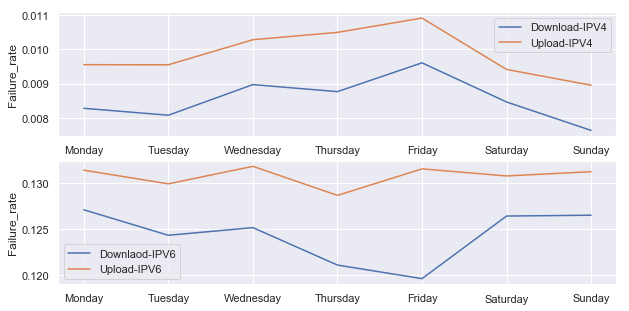

In [60]:
down4_att_ava['dtime'] = pd.to_datetime(down4_att_ava['dtime'])
down4_att_weekend = down4_att_ava[['dtime','failures','attempt']].\
    groupby(down4_att_ava.dtime.dt.weekday_name).sum()
down4_att_weekend['failure_rate'] = down4_att_weekend['failures'] / down4_att_weekend['attempt']
down4_att_weekend = down4_att_weekend[['failure_rate']]

down6_att_ava['dtime'] = pd.to_datetime(down6_att_ava['dtime'])
down6_att_weekend = down6_att_ava[['dtime','failures','attempt']].\
    groupby(down6_att_ava.dtime.dt.weekday_name).sum()
down6_att_weekend['failure_rate'] = down6_att_weekend['failures'] / down6_att_weekend['attempt']
down6_att_weekend = down6_att_weekend[['failure_rate']]

up4_att_ava['dtime'] = pd.to_datetime(up4_att_ava['dtime'])
up4_att_weekend = up4_att_ava[['dtime','failures','attempt']].\
    groupby(up4_att_ava.dtime.dt.weekday_name).sum()
up4_att_weekend['failure_rate'] = up4_att_weekend['failures'] / up4_att_weekend['attempt']
up4_att_weekend = up4_att_weekend[['failure_rate']]

up6_att_ava['dtime'] = pd.to_datetime(up6_att_ava['dtime'])
up6_att_weekend = up6_att_ava[['dtime','failures','attempt']].\
    groupby(up6_att_ava.dtime.dt.weekday_name).sum()
up6_att_weekend['failure_rate'] = up6_att_weekend['failures'] / up6_att_weekend['attempt']
up6_att_weekend = up6_att_weekend[['failure_rate']]

att_weekend_plot = pd.concat([down4_att_weekend, down6_att_weekend], axis = 1)
att_weekend_plot = pd.concat([att_weekend_plot, up4_att_weekend], axis = 1)
att_weekend_plot = pd.concat([att_weekend_plot, up6_att_weekend], axis = 1)
att_weekend_plot.columns = ['Download-IPV4', 'Downlaod-IPV6', 'Upload-IPV4', 'Upload-IPV6']
att_weekend_plot.reset_index('dtime', inplace = True)
att_weekend_plot = att_weekend_plot.reindex([1,5,6,4,0,2,3])
att_weekend_plot.reset_index(drop = True, inplace = True)

fig, ax = plt.subplots(2, 1, figsize=(10,5))
_ = ax[0].plot('dtime', 'Download-IPV4', data = att_weekend_plot)
_ = ax[1].plot('dtime', 'Downlaod-IPV6', data = att_weekend_plot)
_ = ax[0].plot('dtime', 'Upload-IPV4', data = att_weekend_plot)
_ = ax[1].plot('dtime', 'Upload-IPV6', data = att_weekend_plot)
_ = ax[0].legend()
_ = ax[0].set_ylabel('Failure_rate')
_ = ax[1].legend()
_ = ax[1].set_ylabel('Failure_rate')

In [61]:
# begin to explore if outrage relevant to time

In [62]:
down4_att_failure_time = down_outrage4_att[['dtime', 'failures']].groupby(down_outrage4_att['dtime'].dt.hour).sum()
down4_att_attempt_time = curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt['dtime'].dt.hour).sum()
down4_att_ava_time = pd.concat([down4_att_failure_time, down4_att_attempt_time], axis = 1)
down4_att_ava_time['failure_rate'] = down4_att_ava_time['failures'] / down4_att_ava_time['attempt']
down4_att_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down4_att_ava_time)
down4_att_ava_time['Down/Up-4/6'] = ['Download-IPV4'] * len(down4_att_ava_time)
down4_att_ava_time.reset_index('dtime', inplace = True)

down6_att_failure_time = down_outrage6_att[['dtime', 'failures']].groupby(down_outrage6_att['dtime'].dt.hour).sum()
down6_att_attempt_time = curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt6['dtime'].dt.hour).sum()
down6_att_ava_time = pd.concat([down6_att_failure_time, down6_att_attempt_time], axis = 1)
down6_att_ava_time['failure_rate'] = down6_att_ava_time['failures'] / down6_att_ava_time['attempt']
down6_att_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down6_att_ava_time)
down6_att_ava_time['Down/Up-4/6'] = ['Download-IPV6'] * len(down6_att_ava_time)
down6_att_ava_time.reset_index('dtime', inplace = True)

up4_att_failure_time = up_outrage4_att[['dtime', 'failures']].groupby(up_outrage4_att['dtime'].dt.hour).sum()
up4_att_attempt_time = curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt['dtime'].dt.hour).sum()
up4_att_ava_time = pd.concat([up4_att_failure_time, up4_att_attempt_time], axis = 1)
up4_att_ava_time['failure_rate'] = up4_att_ava_time['failures'] / up4_att_ava_time['attempt']
up4_att_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up4_att_ava_time)
up4_att_ava_time['Down/Up-4/6'] = ['Upload-IPV4'] * len(up4_att_ava_time)
up4_att_ava_time.reset_index('dtime', inplace = True)

up6_att_failure_time = up_outrage6_att[['dtime', 'failures']].groupby(up_outrage6_att['dtime'].dt.hour).sum()
up6_att_attempt_time = curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt6['dtime'].dt.hour).sum()
up6_att_ava_time = pd.concat([up6_att_failure_time, up6_att_attempt_time], axis = 1)
up6_att_ava_time['failure_rate'] = up6_att_ava_time['failures'] / up6_att_ava_time['attempt']
up6_att_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up6_att_ava_time)
up6_att_ava_time['Down/Up-4/6'] = ['Upload-IPV6'] * len(up6_att_ava_time)
up6_att_ava_time.reset_index('dtime', inplace = True)

down4_att_ava_time.head()

,dtime,failures,attempt,failure_rate,ISP-Technology,Down/Up-4/6
0,0,973,95609,0.010177,AT&T-IPBB,Download-IPV4
1,1,830,103557,0.008015,AT&T-IPBB,Download-IPV4
2,2,998,112545,0.008868,AT&T-IPBB,Download-IPV4
3,3,968,114191,0.008477,AT&T-IPBB,Download-IPV4
4,4,761,99413,0.007655,AT&T-IPBB,Download-IPV4


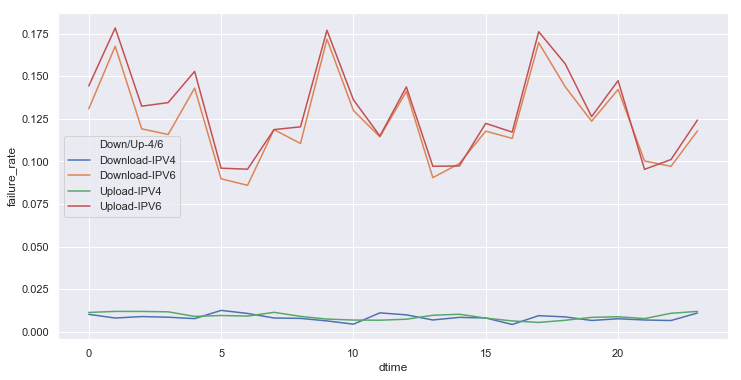

In [63]:
att_ava_plot = down4_att_ava_time
att_ava_plot = att_ava_plot.append(down6_att_ava_time, ignore_index=True)
att_ava_plot = att_ava_plot.append(up4_att_ava_time, ignore_index=True)
att_ava_plot = att_ava_plot.append(up6_att_ava_time, ignore_index=True)

fig, ax = plt.subplots(1, 1, figsize=(12,6))
_ = sns.lineplot(data= att_ava_plot, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

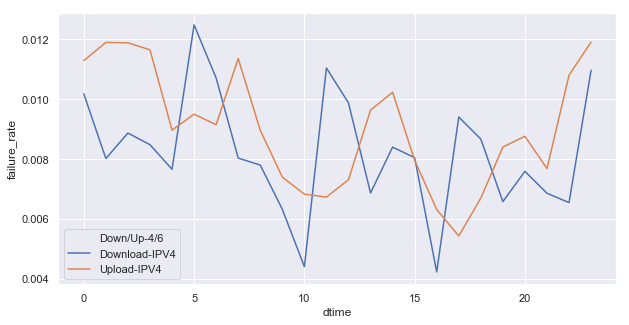

In [64]:
ipv4_data = att_ava_plot.loc[(att_ava_plot['Down/Up-4/6']=='Download-IPV4') | (att_ava_plot['Down/Up-4/6']=='Upload-IPV4')]
fig, ax = plt.subplots(1, 1, figsize=(10,5))
_ = sns.lineplot(data= ipv4_data, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

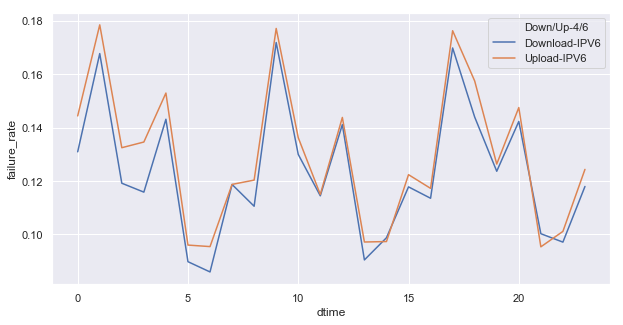

In [65]:
ipv6_data = att_ava_plot.loc[(att_ava_plot['Down/Up-4/6']=='Download-IPV6') | (att_ava_plot['Down/Up-4/6']=='Upload-IPV6')]
fig, ax = plt.subplots(1, 1, figsize=(10,5))
_ = sns.lineplot(data= ipv6_data, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

In [66]:
# begin regional exploration

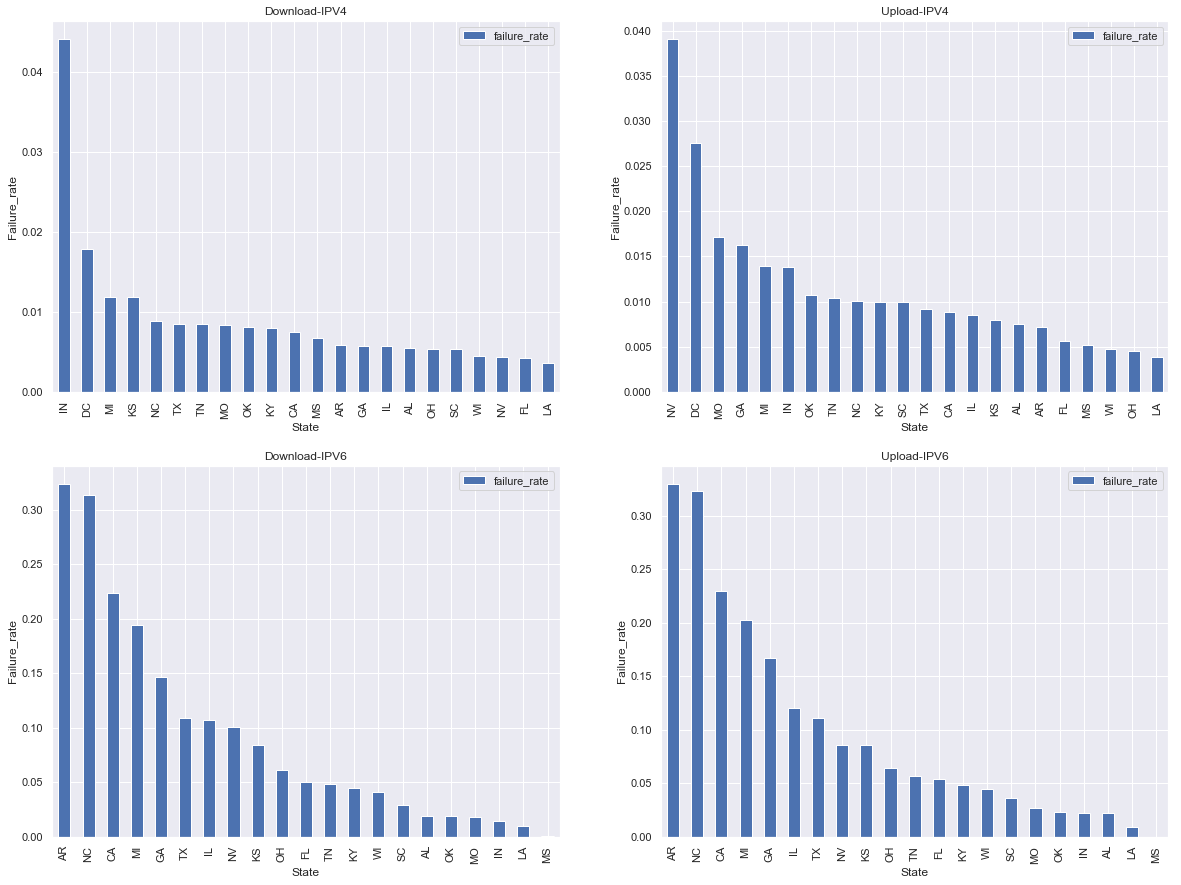

In [67]:
down4_att_attempt_region = curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
down4_att_attempt_region.reset_index(drop = True, inplace = True)
down4_att_attempt_region = down4_att_attempt_region.groupby(down4_att_attempt_region['State']).sum()
down4_att_attempt_region['failure_rate'] = round(down4_att_attempt_region['failures'] / down4_att_attempt_region['attempt'],4)
down4_att_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

down6_att_attempt_region = curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
down6_att_attempt_region.reset_index(drop = True, inplace = True)
down6_att_attempt_region = down6_att_attempt_region.groupby(down6_att_attempt_region['State']).sum()
down6_att_attempt_region['failure_rate'] = round(down6_att_attempt_region['failures'] / down6_att_attempt_region['attempt'],4)
down6_att_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

up4_att_attempt_region = curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
up4_att_attempt_region.reset_index(drop = True, inplace = True)
up4_att_attempt_region = up4_att_attempt_region.groupby(up4_att_attempt_region['State']).sum()
up4_att_attempt_region['failure_rate'] = round(up4_att_attempt_region['failures'] / up4_att_attempt_region['attempt'],4)
up4_att_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

up6_att_attempt_region = curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
up6_att_attempt_region.reset_index(drop = True, inplace = True)
up6_att_attempt_region = up6_att_attempt_region.groupby(up6_att_attempt_region['State']).sum()
up6_att_attempt_region['failure_rate'] = round(up6_att_attempt_region['failures'] / up6_att_attempt_region['attempt'],4)
up6_att_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

fig, ax = plt.subplots(2, 2, figsize=(20,15))
_ = down4_att_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[0][0])
_ = ax[0][0].set_title('Download-IPV4')
_ = up4_att_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[0][1])
_ = ax[0][1].set_title('Upload-IPV4')
_ = down6_att_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[1][0])
_ = ax[1][0].set_title('Download-IPV6')
_ = up6_att_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[1][1])
_ = ax[1][1].set_title('Upload-IPV6')
_ = ax[0][0].set_ylabel('Failure_rate')
_ = ax[0][1].set_ylabel('Failure_rate')
_ = ax[1][0].set_ylabel('Failure_rate')
_ = ax[1][1].set_ylabel('Failure_rate')

## CenturyLink

In [29]:
ISP_present = 'CenturyLink'

In [30]:
print(curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present]['Technology'].unique())
print(curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present]['Technology'].unique())
print(curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present]['Technology'].unique())
print(curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present]['Technology'].unique())

['DSL']
['DSL']
['DSL']
['DSL']


In [31]:
# CenturyLink only provides DSL technology.

In [32]:
Technology_present = 'DSL'

In [33]:
print('{} percentage among all the observations:'.format(ISP_present))
print('Download_IPV4:', len(curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present]) / len(curr_httpgetmt))
print('Download_IPV6:', len(curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present]) / len(curr_httpgetmt6))
print('Upload_IPV4:', len(curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present]) / len(curr_httppostmt))
print('Upload_IPV6:', len(curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present]) / len(curr_httppostmt6))

CenturyLink percentage among all the observations:
Download_IPV4: 0.11584010765496694
Download_IPV6: 0.021864510813366437
Upload_IPV4: 0.1160516034258312
Upload_IPV6: 0.02200693562154381


In [34]:
print('{} percentage among all the outrages:'.format(ISP_present))
down_outrage4_cl = down_outrage4.loc[down_outrage4['ISP'] == ISP_present]
down_outrage4_cl.reset_index(drop = True, inplace = True)
print('Download_IPV4:', len(down_outrage4_cl) / len(down_outrage4))
down_outrage6_cl = down_outrage6.loc[down_outrage6['ISP'] == ISP_present]
down_outrage6_cl.reset_index(drop = True, inplace = True)
print('Download_IPV6:', len(down_outrage6_cl) / len(down_outrage6))
up_outrage4_cl = up_outrage4.loc[up_outrage4['ISP'] == ISP_present]
up_outrage4_cl.reset_index(drop = True, inplace = True)
print('Upload_IPV4:', len(up_outrage4_cl) / len(up_outrage4))
up_outrage6_cl = up_outrage6.loc[up_outrage6['ISP'] == ISP_present]
up_outrage6_cl.reset_index(drop = True, inplace = True)
print('Upload_IPV6:', len(up_outrage6_cl) / len(up_outrage6))

CenturyLink percentage among all the outrages:
Download_IPV4: 0.08859416445623342
Download_IPV6: 0.05017135628870225
Upload_IPV4: 0.13612464652255196
Upload_IPV6: 0.04854827069338811


In [35]:
# Compared the two percentages correspondingly, we could say that the IPV4 service of CenturyLink is above average 
# of all IPV4 service provider but IPV6 is below average.

In [36]:
print(down_outrage4_cl['Technology'].unique())
print(down_outrage6_cl['Technology'].unique())
print(up_outrage4_cl['Technology'].unique())
print(up_outrage6_cl['Technology'].unique())

['DSL']
['DSL']
['DSL']
['DSL']


In [37]:
# begin to plot by date

In [38]:
down4_cl_failure_day = down_outrage4_cl[['dtime', 'failures']].groupby(down_outrage4_cl['dtime'].dt.date).sum()
down4_cl_attempt_day = curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt['dtime'].dt.date).sum()
down4_cl_ava = pd.concat([down4_cl_failure_day, down4_cl_attempt_day], axis = 1)
down4_cl_ava['failure_rate'] = down4_cl_ava['failures'] / down4_cl_ava['attempt']
down4_cl_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down4_cl_ava)
down4_cl_ava['Down/Up-4/6'] = ['Download-IPV4'] * len(down4_cl_ava)
down4_cl_ava.reset_index('dtime', inplace = True)

down6_cl_failure_day = down_outrage6_cl[['dtime', 'failures']].groupby(down_outrage6_cl['dtime'].dt.date).sum()
down6_cl_attempt_day = curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt6['dtime'].dt.date).sum()
down6_cl_ava = pd.concat([down6_cl_failure_day, down6_cl_attempt_day], axis = 1)
down6_cl_ava['failure_rate'] = down6_cl_ava['failures'] / down6_cl_ava['attempt']
down6_cl_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down6_cl_ava)
down6_cl_ava['Down/Up-4/6'] = ['Download-IPV6'] * len(down6_cl_ava)
down6_cl_ava.reset_index('dtime', inplace = True)

up4_cl_failure_day = up_outrage4_cl[['dtime', 'failures']].groupby(up_outrage4_cl['dtime'].dt.date).sum()
up4_cl_attempt_day = curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt['dtime'].dt.date).sum()
up4_cl_ava = pd.concat([up4_cl_failure_day, up4_cl_attempt_day], axis = 1)
up4_cl_ava['failure_rate'] = up4_cl_ava['failures'] / up4_cl_ava['attempt']
up4_cl_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up4_cl_ava)
up4_cl_ava['Down/Up-4/6'] = ['Upload-IPV4'] * len(up4_cl_ava)
up4_cl_ava.reset_index('dtime', inplace = True)

up6_cl_failure_day = up_outrage6_cl[['dtime', 'failures']].groupby(up_outrage6_cl['dtime'].dt.date).sum()
up6_cl_attempt_day = curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt6['dtime'].dt.date).sum()
up6_cl_ava = pd.concat([up6_cl_failure_day, up6_cl_attempt_day], axis = 1)
up6_cl_ava['failure_rate'] = up6_cl_ava['failures'] / up6_cl_ava['attempt']
up6_cl_ava['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up6_cl_ava)
up6_cl_ava['Down/Up-4/6'] = ['Upload-IPV6'] * len(up6_cl_ava)
up6_cl_ava.reset_index('dtime', inplace = True)

down4_cl_ava.head()

,dtime,failures,attempt,failure_rate,ISP-Technology,Down/Up-4/6
0,2018-01-01,92,6744,0.013642,CenturyLink-DSL,Download-IPV4
1,2018-01-02,120,6804,0.017637,CenturyLink-DSL,Download-IPV4
2,2018-01-03,113,6779,0.016669,CenturyLink-DSL,Download-IPV4
3,2018-01-04,117,6767,0.017290,CenturyLink-DSL,Download-IPV4
4,2018-01-05,108,6856,0.015753,CenturyLink-DSL,Download-IPV4


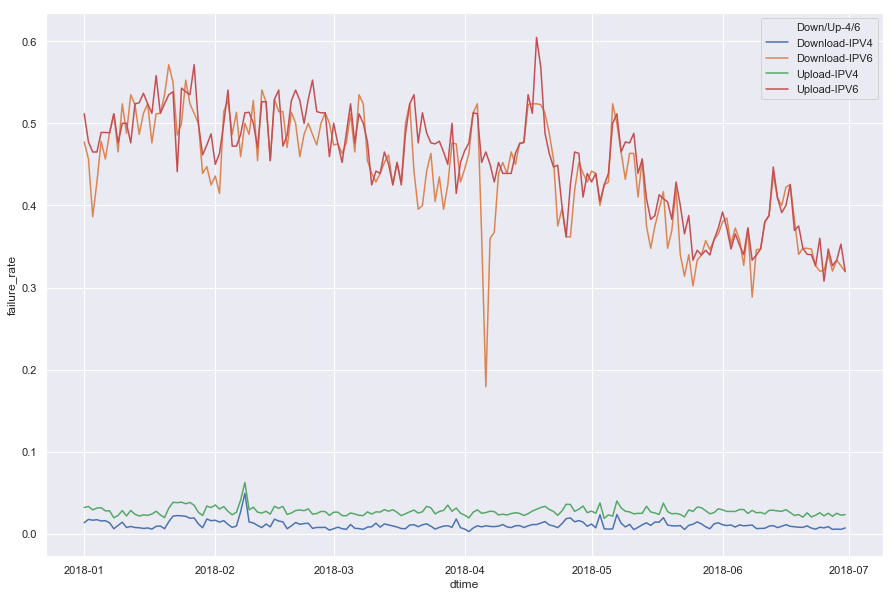

In [39]:
cl_ava_plot = down4_cl_ava
cl_ava_plot = cl_ava_plot.append(down6_cl_ava, ignore_index=True)
cl_ava_plot = cl_ava_plot.append(up4_cl_ava, ignore_index=True)
cl_ava_plot = cl_ava_plot.append(up6_cl_ava, ignore_index=True)

fig, ax = plt.subplots(1, 1, figsize=(15,10))
_ = sns.lineplot(data=cl_ava_plot, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

In [40]:
print('Proportion of days that has >99%,98%-99%,95%-98%,<95% availability rate:')
print('\n')
print('Download_IPV4:')
print('>99%:', round(len(down4_cl_ava.loc[down4_cl_ava.failure_rate < 0.01])/len(down4_cl_ava), 2))
print('98%-99%:', round(len(down4_cl_ava.loc[(down4_cl_ava.failure_rate >= 0.01)&\
                                             (down4_cl_ava.failure_rate < 0.02)])/len(down4_cl_ava), 2))
print('95%-98%:', round(len(down4_cl_ava.loc[(down4_cl_ava.failure_rate >= 0.02)&\
                                             (down4_cl_ava.failure_rate < 0.05)])/len(down4_cl_ava), 2))
print('<95%:', round(len(down4_cl_ava.loc[down4_cl_ava.failure_rate > 0.05])/len(down4_cl_ava), 2))

print('\n')
print('Download_IPV6:')
print('>90%:', round(len(down6_cl_ava.loc[down6_cl_ava.failure_rate < 0.1])/len(down6_cl_ava), 2))
print('85%-90%:', round(len(down6_cl_ava.loc[(down6_cl_ava.failure_rate >= 0.1)&\
                                             (down6_cl_ava.failure_rate < 0.15)])/len(down6_cl_ava), 2))
print('<85%:', round(len(down6_cl_ava.loc[down6_cl_ava.failure_rate > 0.15])/len(down6_cl_ava), 2))

print('\n')
print('Upload_IPV4:')
print('>99%:', round(len(up4_cl_ava.loc[up4_cl_ava.failure_rate < 0.01])/len(up4_cl_ava), 2))
print('98%-99%:', round(len(up4_cl_ava.loc[(up4_cl_ava.failure_rate >= 0.01)&\
                                             (up4_cl_ava.failure_rate < 0.02)])/len(up4_cl_ava), 2))
print('95%-98%:', round(len(up4_cl_ava.loc[(up4_cl_ava.failure_rate >= 0.02)&\
                                             (up4_cl_ava.failure_rate < 0.05)])/len(up4_cl_ava), 2))
print('<95%:', round(len(up4_cl_ava.loc[up4_cl_ava.failure_rate > 0.05])/len(up4_cl_ava), 2))

print('\n')
print('Upload_IPV6:')
print('>90%:', round(len(up6_cl_ava.loc[up6_cl_ava.failure_rate < 0.1])/len(up6_cl_ava), 2))
print('85%-90%:', round(len(up6_cl_ava.loc[(up6_cl_ava.failure_rate >= 0.1)&\
                                             (up6_cl_ava.failure_rate < 0.15)])/len(up6_cl_ava), 2))
print('<85%:', round(len(up6_cl_ava.loc[up6_cl_ava.failure_rate > 0.15])/len(up6_cl_ava), 2))

Proportion of days that has >99%,98%-99%,95%-98%,<95% availability rate:


Download_IPV4:
>99%: 0.53
98%-99%: 0.43
95%-98%: 0.04
<95%: 0.0


Download_IPV6:
>90%: 0.0
85%-90%: 0.0
<85%: 1.0


Upload_IPV4:
>99%: 0.0
98%-99%: 0.02
95%-98%: 0.97
<95%: 0.01


Upload_IPV6:
>90%: 0.0
85%-90%: 0.0
<85%: 1.0


In [41]:
# We explore whether the days with low availability are relevant to weekends.

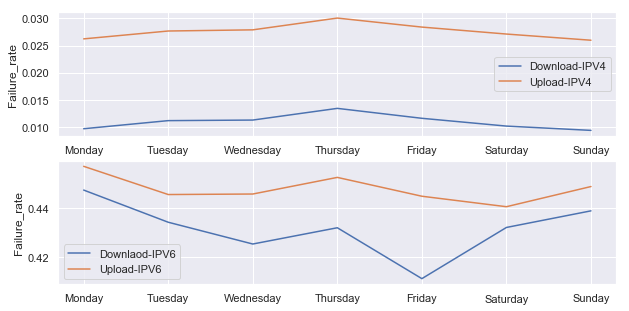

In [42]:
down4_cl_ava['dtime'] = pd.to_datetime(down4_cl_ava['dtime'])
down4_cl_weekend = down4_cl_ava[['dtime','failures','attempt']].\
    groupby(down4_cl_ava.dtime.dt.weekday_name).sum()
down4_cl_weekend['failure_rate'] = down4_cl_weekend['failures'] / down4_cl_weekend['attempt']
down4_cl_weekend = down4_cl_weekend[['failure_rate']]

down6_cl_ava['dtime'] = pd.to_datetime(down6_cl_ava['dtime'])
down6_cl_weekend = down6_cl_ava[['dtime','failures','attempt']].\
    groupby(down6_cl_ava.dtime.dt.weekday_name).sum()
down6_cl_weekend['failure_rate'] = down6_cl_weekend['failures'] / down6_cl_weekend['attempt']
down6_cl_weekend = down6_cl_weekend[['failure_rate']]

up4_cl_ava['dtime'] = pd.to_datetime(up4_cl_ava['dtime'])
up4_cl_weekend = up4_cl_ava[['dtime','failures','attempt']].\
    groupby(up4_cl_ava.dtime.dt.weekday_name).sum()
up4_cl_weekend['failure_rate'] = up4_cl_weekend['failures'] / up4_cl_weekend['attempt']
up4_cl_weekend = up4_cl_weekend[['failure_rate']]

up6_cl_ava['dtime'] = pd.to_datetime(up6_cl_ava['dtime'])
up6_cl_weekend = up6_cl_ava[['dtime','failures','attempt']].\
    groupby(up6_cl_ava.dtime.dt.weekday_name).sum()
up6_cl_weekend['failure_rate'] = up6_cl_weekend['failures'] / up6_cl_weekend['attempt']
up6_cl_weekend = up6_cl_weekend[['failure_rate']]

cl_weekend_plot = pd.concat([down4_cl_weekend, down6_cl_weekend], axis = 1)
cl_weekend_plot = pd.concat([cl_weekend_plot, up4_cl_weekend], axis = 1)
cl_weekend_plot = pd.concat([cl_weekend_plot, up6_cl_weekend], axis = 1)
cl_weekend_plot.columns = ['Download-IPV4', 'Downlaod-IPV6', 'Upload-IPV4', 'Upload-IPV6']
cl_weekend_plot.reset_index('dtime', inplace = True)
cl_weekend_plot = cl_weekend_plot.reindex([1,5,6,4,0,2,3])
cl_weekend_plot.reset_index(drop = True, inplace = True)

fig, ax = plt.subplots(2, 1, figsize=(10,5))
_ = ax[0].plot('dtime', 'Download-IPV4', data = cl_weekend_plot)
_ = ax[1].plot('dtime', 'Downlaod-IPV6', data = cl_weekend_plot)
_ = ax[0].plot('dtime', 'Upload-IPV4', data = cl_weekend_plot)
_ = ax[1].plot('dtime', 'Upload-IPV6', data = cl_weekend_plot)
_ = ax[0].legend()
_ = ax[0].set_ylabel('Failure_rate')
_ = ax[1].legend()
_ = ax[1].set_ylabel('Failure_rate')

In [43]:
# begin to explore if outrage relevant to time

In [44]:
down4_cl_failure_time = down_outrage4_cl[['dtime', 'failures']].groupby(down_outrage4_cl['dtime'].dt.hour).sum()
down4_cl_clempt_time = curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt['dtime'].dt.hour).sum()
down4_cl_ava_time = pd.concat([down4_cl_failure_time, down4_cl_clempt_time], axis = 1)
down4_cl_ava_time['failure_rate'] = down4_cl_ava_time['failures'] / down4_cl_ava_time['attempt']
down4_cl_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down4_cl_ava_time)
down4_cl_ava_time['Down/Up-4/6'] = ['Download-IPV4'] * len(down4_cl_ava_time)
down4_cl_ava_time.reset_index('dtime', inplace = True)

down6_cl_failure_time = down_outrage6_cl[['dtime', 'failures']].groupby(down_outrage6_cl['dtime'].dt.hour).sum()
down6_cl_clempt_time = curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httpgetmt6['dtime'].dt.hour).sum()
down6_cl_ava_time = pd.concat([down6_cl_failure_time, down6_cl_clempt_time], axis = 1)
down6_cl_ava_time['failure_rate'] = down6_cl_ava_time['failures'] / down6_cl_ava_time['attempt']
down6_cl_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(down6_cl_ava_time)
down6_cl_ava_time['Down/Up-4/6'] = ['Download-IPV6'] * len(down6_cl_ava_time)
down6_cl_ava_time.reset_index('dtime', inplace = True)

up4_cl_failure_time = up_outrage4_cl[['dtime', 'failures']].groupby(up_outrage4_cl['dtime'].dt.hour).sum()
up4_cl_clempt_time = curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt['dtime'].dt.hour).sum()
up4_cl_ava_time = pd.concat([up4_cl_failure_time, up4_cl_clempt_time], axis = 1)
up4_cl_ava_time['failure_rate'] = up4_cl_ava_time['failures'] / up4_cl_ava_time['attempt']
up4_cl_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up4_cl_ava_time)
up4_cl_ava_time['Down/Up-4/6'] = ['Upload-IPV4'] * len(up4_cl_ava_time)
up4_cl_ava_time.reset_index('dtime', inplace = True)

up6_cl_failure_time = up_outrage6_cl[['dtime', 'failures']].groupby(up_outrage6_cl['dtime'].dt.hour).sum()
up6_cl_clempt_time = curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present, ['dtime', 'attempt']].\
    groupby(curr_httppostmt6['dtime'].dt.hour).sum()
up6_cl_ava_time = pd.concat([up6_cl_failure_time, up6_cl_clempt_time], axis = 1)
up6_cl_ava_time['failure_rate'] = up6_cl_ava_time['failures'] / up6_cl_ava_time['attempt']
up6_cl_ava_time['ISP-Technology'] = ['{}-{}'.format(ISP_present, Technology_present)] * len(up6_cl_ava_time)
up6_cl_ava_time['Down/Up-4/6'] = ['Upload-IPV6'] * len(up6_cl_ava_time)
up6_cl_ava_time.reset_index('dtime', inplace = True)

down4_cl_ava_time.head()

,dtime,failures,attempt,failure_rate,ISP-Technology,Down/Up-4/6
0,0,916,78804,0.011624,CenturyLink-DSL,Download-IPV4
1,1,996,102930,0.009676,CenturyLink-DSL,Download-IPV4
2,2,1180,115252,0.010238,CenturyLink-DSL,Download-IPV4
3,3,1009,109568,0.009209,CenturyLink-DSL,Download-IPV4
4,4,1018,103226,0.009862,CenturyLink-DSL,Download-IPV4


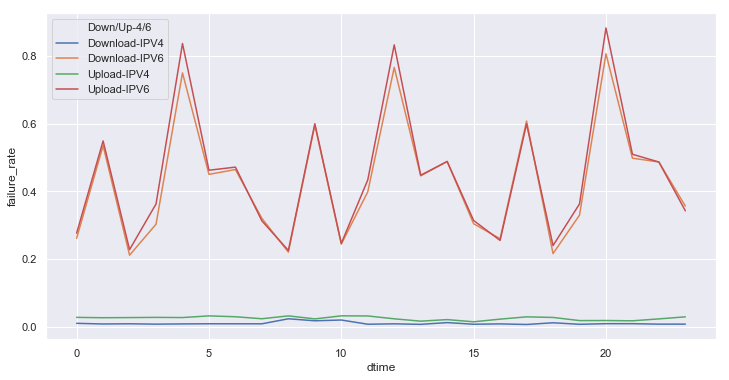

In [45]:
cl_ava_plot = down4_cl_ava_time
cl_ava_plot = cl_ava_plot.append(down6_cl_ava_time, ignore_index=True)
cl_ava_plot = cl_ava_plot.append(up4_cl_ava_time, ignore_index=True)
cl_ava_plot = cl_ava_plot.append(up6_cl_ava_time, ignore_index=True)

fig, ax = plt.subplots(1, 1, figsize=(12,6))
_ = sns.lineplot(data= cl_ava_plot, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

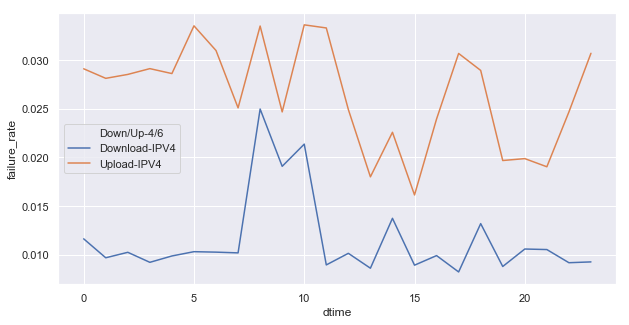

In [46]:
ipv4_data = cl_ava_plot.loc[(cl_ava_plot['Down/Up-4/6']=='Download-IPV4') | (cl_ava_plot['Down/Up-4/6']=='Upload-IPV4')]
fig, ax = plt.subplots(1, 1, figsize=(10,5))
_ = sns.lineplot(data= ipv4_data, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

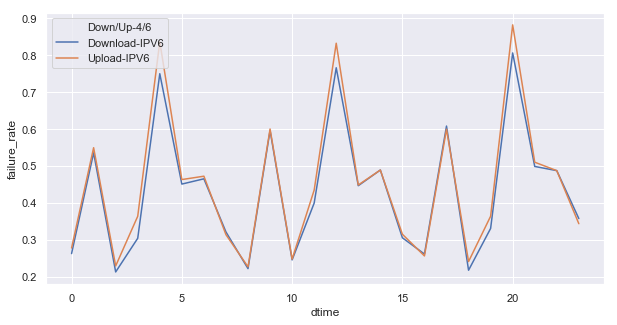

In [47]:
ipv6_data = cl_ava_plot.loc[(cl_ava_plot['Down/Up-4/6']=='Download-IPV6') | (cl_ava_plot['Down/Up-4/6']=='Upload-IPV6')]
fig, ax = plt.subplots(1, 1, figsize=(10,5))
_ = sns.lineplot(data= ipv6_data, x='dtime', y='failure_rate', hue='Down/Up-4/6',ax=ax)

In [48]:
# begin regional exploration

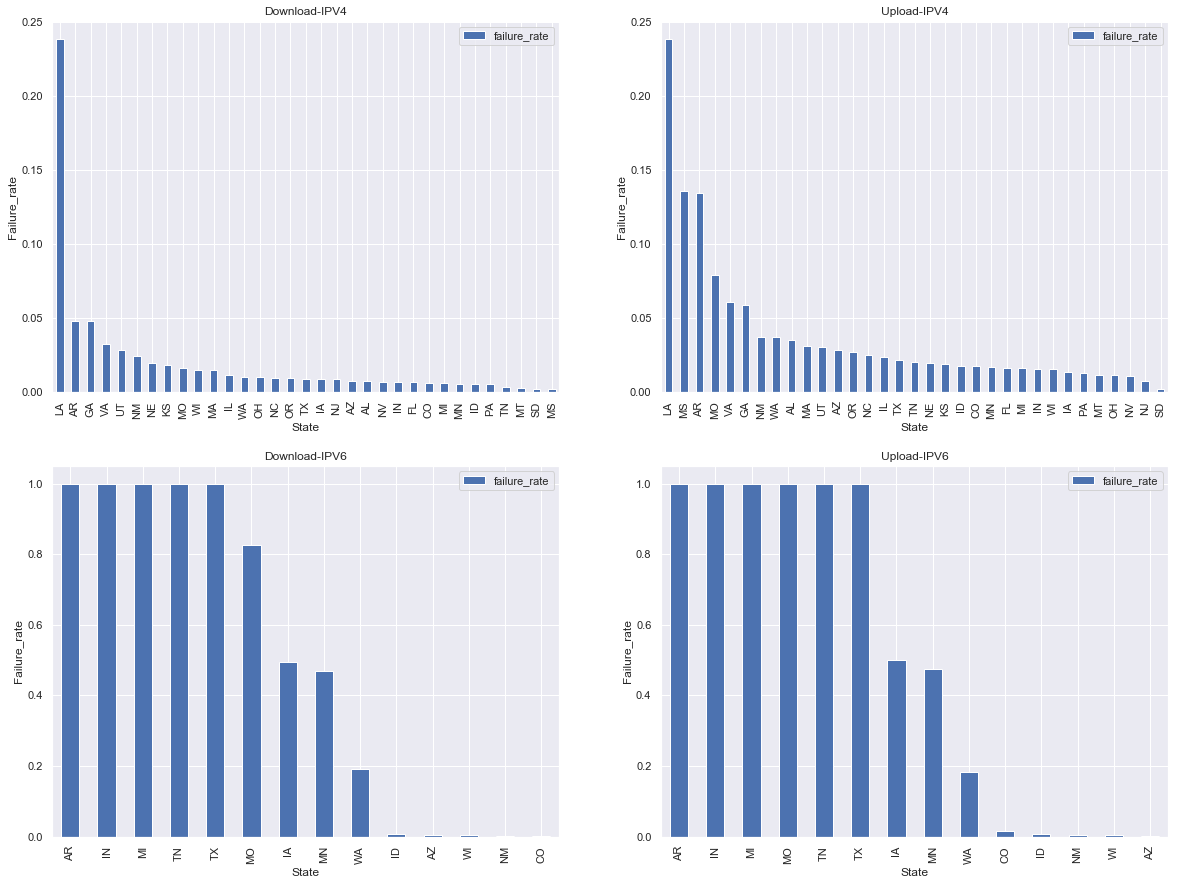

In [51]:
down4_cl_attempt_region = curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
down4_cl_attempt_region.reset_index(drop = True, inplace = True)
down4_cl_attempt_region = down4_cl_attempt_region.groupby(down4_cl_attempt_region['State']).sum()
down4_cl_attempt_region['failure_rate'] = round(down4_cl_attempt_region['failures'] / down4_cl_attempt_region['attempt'],4)
down4_cl_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

down6_cl_attempt_region = curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
down6_cl_attempt_region.reset_index(drop = True, inplace = True)
down6_cl_attempt_region = down6_cl_attempt_region.groupby(down6_cl_attempt_region['State']).sum()
down6_cl_attempt_region['failure_rate'] = round(down6_cl_attempt_region['failures'] / down6_cl_attempt_region['attempt'],4)
down6_cl_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

up4_cl_attempt_region = curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
up4_cl_attempt_region.reset_index(drop = True, inplace = True)
up4_cl_attempt_region = up4_cl_attempt_region.groupby(up4_cl_attempt_region['State']).sum()
up4_cl_attempt_region['failure_rate'] = round(up4_cl_attempt_region['failures'] / up4_cl_attempt_region['attempt'],4)
up4_cl_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

up6_cl_attempt_region = curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present, ['failures', 'attempt', 'State']]
up6_cl_attempt_region.reset_index(drop = True, inplace = True)
up6_cl_attempt_region = up6_cl_attempt_region.groupby(up6_cl_attempt_region['State']).sum()
up6_cl_attempt_region['failure_rate'] = round(up6_cl_attempt_region['failures'] / up6_cl_attempt_region['attempt'],4)
up6_cl_attempt_region.sort_values('failure_rate', inplace = True, ascending = False)

fig, ax = plt.subplots(2, 2, figsize=(20,15))
_ = down4_cl_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[0][0])
_ = ax[0][0].set_title('Download-IPV4')
_ = up4_cl_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[0][1])
_ = ax[0][1].set_title('Upload-IPV4')
_ = down6_cl_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[1][0])
_ = ax[1][0].set_title('Download-IPV6')
_ = up6_cl_attempt_region[['failure_rate']].plot(kind='bar',ax=ax[1][1])
_ = ax[1][1].set_title('Upload-IPV6')
_ = ax[0][0].set_ylabel('Failure_rate')
_ = ax[0][1].set_ylabel('Failure_rate')
_ = ax[1][0].set_ylabel('Failure_rate')
_ = ax[1][1].set_ylabel('Failure_rate')

### Frontier 

In [52]:
ISP_present = 'Frontier '

In [53]:
print(curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present]['Technology'].unique())
print(curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present]['Technology'].unique())
print(curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present]['Technology'].unique())
print(curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present]['Technology'].unique())

['DSL' 'Fiber']
['DSL' 'Fiber']
['DSL' 'Fiber']
['DSL' 'Fiber']


In [54]:
# Frontier provides DSL and Fiber technology.

#### DSL

In [55]:
Technology_present = 'DSL'

In [56]:
print('{} percentage among all the observations:'.format(ISP_present))
print('Download_IPV4:', len(curr_httpgetmt.loc[curr_httpgetmt['ISP'] == ISP_present]) / len(curr_httpgetmt))
print('Download_IPV6:', len(curr_httpgetmt6.loc[curr_httpgetmt6['ISP'] == ISP_present]) / len(curr_httpgetmt6))
print('Upload_IPV4:', len(curr_httppostmt.loc[curr_httppostmt['ISP'] == ISP_present]) / len(curr_httppostmt))
print('Upload_IPV6:', len(curr_httppostmt6.loc[curr_httppostmt6['ISP'] == ISP_present]) / len(curr_httppostmt6))

Frontier  percentage among all the observations:
Download_IPV4: 0.09902208915444344
Download_IPV6: 0.008078920156380467
Upload_IPV4: 0.09914716835477667
Upload_IPV6: 0.008113155989509239


In [57]:
print('{} percentage among all the outrages:'.format(ISP_present))
down_outrage4_cl = down_outrage4.loc[down_outrage4['ISP'] == ISP_present]
down_outrage4_cl.reset_index(drop = True, inplace = True)
print('Download_IPV4:', len(down_outrage4_cl) / len(down_outrage4))
down_outrage6_cl = down_outrage6.loc[down_outrage6['ISP'] == ISP_present]
down_outrage6_cl.reset_index(drop = True, inplace = True)
print('Download_IPV6:', len(down_outrage6_cl) / len(down_outrage6))
up_outrage4_cl = up_outrage4.loc[up_outrage4['ISP'] == ISP_present]
up_outrage4_cl.reset_index(drop = True, inplace = True)
print('Upload_IPV4:', len(up_outrage4_cl) / len(up_outrage4))
up_outrage6_cl = up_outrage6.loc[up_outrage6['ISP'] == ISP_present]
up_outrage6_cl.reset_index(drop = True, inplace = True)
print('Upload_IPV6:', len(up_outrage6_cl) / len(up_outrage6))

Frontier  percentage among all the outrages:
Download_IPV4: 0.0831237727789452
Download_IPV6: 0.020430376395487372
Upload_IPV4: 0.09829346863515993
Upload_IPV6: 0.019194470660078834
